## BDM Project

### Importing Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Set the search parameters
filename = 'SalesData.xlsx'
search_path = '/content/drive/My Drive/BDM Data'

# Search for the file
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path = os.path.join(root, filename)
        break

In [ ]:
df = pd.read_excel('/content/drive/My Drive/BDM Data/SalesData.xlsx')

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:223: UserWarning: Cell AG178046 is marked as a date but the serial value 65416541950 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:223: UserWarning: Cell AG178083 is marked as a date but the serial value 65416541950 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:223: UserWarning: Cell AG178126 is marked as a date but the serial value 65416541950 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:223: UserWarning: Cell AG178149 is marked as a date but the serial value 65416541950 is outside the limits for dates. The cell will be treated as an error.
  warn(ms

In [ ]:
df.shape

(223155, 37)

# Pre-Processing

In [ ]:
df.shape

(223155, 37)

In [ ]:
df.head()

,DATA_FROM,QUARTER,TIME_PERIOD,CURRENCY_NAME,BUSINESS_UNIT,CHAI_MAPPING,PARTNER_MARKET,PARTNER_COUNTRY,PARTNER_CLUSTER,PRODUCT_SEGMENT,...,REVENUE_USD,UNITS,SLS_TTY_IDENTIFIER,RAD_VERTICAL,EMP_TOTAL,EMPLOYEE_GROUP,TAM_PRINT,TAM_PS,REVENUE_PRINT,REVENUE_PS
0,Sell-To,CY20-Q1,Calendar Year,USD,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,...,391.78,4.0,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN
1,Sell-To,CY23-Q2,Calendar Year,USD,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,...,70.92,1.0,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN
2,Sell-To,CY22-Q4,Calendar Year,USD,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,...,238.73,1.0,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN
3,Sell-To,CY23-Q1,Calendar Year,USD,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,...,200.75,1.0,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN
4,Sell-To,CY20-Q4,Calendar Year,USD,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,...,406.44,4.0,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN


In [ ]:
df.rename(columns = {'PrarowasRTNrarR_HQ_NrarowasMrar':'PARTNER_HQ_NAME'}, inplace = True)

Removing Useless Columns:

In [ ]:
df = df.drop(['CURRENCY_NAME'], axis=1)

In [ ]:
#NUMBER OF UNIQUE VALUES
print('BUSINESS UNIT:', df['BUSINESS_UNIT'].nunique())
print('CHAI_MAPPING:', df['CHAI_MAPPING'].nunique())
print('PRODUCT_SEGMENT:', df['PRODUCT_SEGMENT'].nunique())
print('PRODUCT_GROUP:', df['PRODUCT_GROUP'].nunique())
print('PRODUCT_CATEGORY:',df['PRODUCT_CATEGORY'].nunique())
print('PRODUCT_LINE_ID:',df['PRODUCT_LINE_ID'].nunique())

BUSINESS UNIT: 3
CHAI_MAPPING: 8
PRODUCT_SEGMENT: 19
PRODUCT_GROUP: 37
PRODUCT_CATEGORY: 74
PRODUCT_LINE_ID: 107


In [ ]:
df = df.drop(['CHAI_MAPPING', 'PRODUCT_SEGMENT', 'PRODUCT_GROUP', 'PRODUCT_LINE_ID'], axis=1)

In [ ]:
#NUMBER OF UNIQUE VALUES
print('PARTNER_MARKET:', df['PARTNER_MARKET'].nunique())
print('PARTNER_CLUSTER:', df['PARTNER_CLUSTER'].nunique())
print('PARTNER_COUNTRY:', df['PARTNER_COUNTRY'].nunique())

PARTNER_MARKET: 7
PARTNER_CLUSTER: 12
PARTNER_COUNTRY: 13


In [ ]:
df = df.drop(['PARTNER_CLUSTER', 'PARTNER_COUNTRY'], axis=1)

In [ ]:
df.shape

(223155, 30)

In [ ]:
print('PARTNER_CUSTOMER_ID:', df['PARTNER_CUSTOMER_ID'].nunique())
print('PARTNER_HQ_NAME:', df['PARTNER_HQ_NAME'].nunique())
print('PARTNER_LEVEL:', df['PARTNER_LEVEL'].nunique())

PARTNER_CUSTOMER_ID: 18970
PARTNER_HQ_NAME: 15
PARTNER_LEVEL: 3


In [ ]:
print('OPSI_ID:', df['OPSI_ID'].nunique())
print('IS_OPSI:', df['IS_OPSI'].nunique())
print('ORG_ID:', df['ORG_ID'].nunique())
print('ORGANIZATION_EXTENDED_NAME:', df['ORGANIZATION_EXTENDED_NAME'].nunique())
print('ST_ID:', df['ST_ID'].nunique())
print('SALES_TERRITORY_EXTENDED_NAME:', df['SALES_TERRITORY_EXTENDED_NAME'].nunique())
print('ONLINE_FLAG:', df['ONLINE_FLAG'].nunique())
print('EMPLOYEE_GROUP:', df['EMPLOYEE_GROUP'].nunique())

OPSI_ID: 15918
IS_OPSI: 2
ORG_ID: 7693
ORGANIZATION_EXTENDED_NAME: 7498
ST_ID: 2418
SALES_TERRITORY_EXTENDED_NAME: 2409
ONLINE_FLAG: 2
EMPLOYEE_GROUP: 6


In [ ]:
#Finding the missing values:
df.isna().sum()

DATA_FROM                             0
QUARTER                               0
TIME_PERIOD                           0
BUSINESS_UNIT                         0
PARTNER_MARKET                        0
PRODUCT_CATEGORY                      0
PARTNER_HQ_NAME                       0
PARTNER_ID                            0
PARTNER_CUSTOMER_ID               26874
PARTNER_LEVEL                         0
OPSI_ID                           75970
IS_OPSI                               0
ORG_ID                           100464
ORGANIZATION_EXTENDED_NAME       100646
ST_ID                            100579
SALES_TERRITORY_EXTENDED_NAME    102228
ONLINE_FLAG                       84813
REAL_UNITS                        62035
PRODUCT_UNITS                      1350
REVENUE_LC                          154
REVENUE_USD                         154
UNITS                              9948
SLS_TTY_IDENTIFIER               141585
RAD_VERTICAL                     102958
EMP_TOTAL                        102545


Removing columns with lot of missing values (More than half the total datapoints):

In [ ]:
df = df.drop(['OPSI_ID','ORG_ID', 'ORGANIZATION_EXTENDED_NAME','ST_ID','SALES_TERRITORY_EXTENDED_NAME','REAL_UNITS','SLS_TTY_IDENTIFIER','RAD_VERTICAL','EMP_TOTAL','TAM_PRINT','TAM_PS','REVENUE_PRINT','REVENUE_PS'], axis=1)

In [ ]:
df = df.drop(['REVENUE_LC', 'TIME_PERIOD'], axis=1)

In [ ]:
df.head()

,DATA_FROM,QUARTER,BUSINESS_UNIT,PARTNER_MARKET,PRODUCT_CATEGORY,PARTNER_HQ_NAME,PARTNER_ID,PARTNER_CUSTOMER_ID,PARTNER_LEVEL,IS_OPSI,ONLINE_FLAG,PRODUCT_UNITS,REVENUE_USD,UNITS,EMPLOYEE_GROUP
0,Sell-To,CY20-Q1,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,13690,Power Services,True,NaN,4.0,391.78,4.0,NOT IDENTIFIED
1,Sell-To,CY23-Q2,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,13438,Power Services,True,N,1.0,70.92,1.0,NOT IDENTIFIED
2,Sell-To,CY22-Q4,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,15330,Power Services,True,N,1.0,238.73,1.0,NOT IDENTIFIED
3,Sell-To,CY23-Q1,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,15322,Power Services,True,N,1.0,200.75,1.0,NOT IDENTIFIED
4,Sell-To,CY20-Q4,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,13521,Power Services,True,NaN,4.0,406.44,4.0,NOT IDENTIFIED


Processing Date from Quarters:

In [ ]:
typ = df['QUARTER'].str.slice(0, 2, 1)
year = '20' + df['QUARTER'].str.slice(2, 4, 1)
qtr = df['QUARTER'].str.slice(5, 7, 1)

In [ ]:
saledate = []
for i in range(0,len(typ)):
  st = ""
  if(typ[i] == 'CY'):
    if qtr[i] == 'Q1':
      st = st + year[i] + '-01' + '-01'
    elif qtr[i] == 'Q2':
      st = st + year[i] + '-04' + '-01'
    elif qtr[i] == 'Q3':
      st = st + year[i] + '-07' + '-01'
    elif qtr[i] == 'Q4':
      st = st + year[i] + '-10' + '-01'
  else:
    if qtr[i] == 'Q1':
      st = st + year[i] + '-11' + '-01'
    elif qtr[i] == 'Q2':
      st = st + year[i] + '-02' + '-01'
    elif qtr[i] == 'Q3':
      st = st + year[i] + '-05' + '-01'
    elif qtr[i] == 'Q4':
      st = st + year[i] + '-08' + '-01'
  saledate.append(st)

In [ ]:
from datetime import timedelta
df['DATE'] = saledate
df['DATE'] = pd.to_datetime(df['DATE'])
df

,DATA_FROM,QUARTER,BUSINESS_UNIT,PARTNER_MARKET,PRODUCT_CATEGORY,PARTNER_HQ_NAME,PARTNER_ID,PARTNER_CUSTOMER_ID,PARTNER_LEVEL,IS_OPSI,ONLINE_FLAG,PRODUCT_UNITS,REVENUE_USD,UNITS,EMPLOYEE_GROUP,DATE
0,Sell-To,CY20-Q1,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,13690,Power Services,True,NaN,4.0,391.78,4.0,NOT IDENTIFIED,2020-01-01
1,Sell-To,CY23-Q2,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,13438,Power Services,True,N,1.0,70.92,1.0,NOT IDENTIFIED,2023-04-01
2,Sell-To,CY22-Q4,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,15330,Power Services,True,N,1.0,238.73,1.0,NOT IDENTIFIED,2022-10-01
3,Sell-To,CY23-Q1,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,15322,Power Services,True,N,1.0,200.75,1.0,NOT IDENTIFIED,2023-01-01
4,Sell-To,CY20-Q4,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,13521,Power Services,True,NaN,4.0,406.44,4.0,NOT IDENTIFIED,2020-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223150,Sell-To,FY21-Q3,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,67519,Power Services,True,N,3.0,500.36,3.0,506541000,2021-05-01
223151,Sell-To,FY22-Q4,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,15303,Power Services,True,N,9.0,1612.35,9.0,506541000,2022-08-01
223152,Sell-To,FY21-Q4,Printing HW,North America,Office Non Managed,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,26103,Power Services,True,N,1.0,783.41,1.0,> 1000,2021-08-01
223153,Sell-To,FY20-Q3,Printing HW,North America,Office Managed,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,WS7038,Power Services,True,NaN,2.0,3672.32,2.0,065410-2023,2020-05-01


In [ ]:
import datetime
from datetime import datetime
saledate2 = []
for i in saledate:
  dt = datetime.strptime(i, '%Y-%m-%d')
  saledate2.append(dt)

In [ ]:
df = df.drop(['EMPLOYEE_GROUP', 'QUARTER'], axis = 1)

In [ ]:
df['DATE'] = saledate2
df

,DATA_FROM,BUSINESS_UNIT,PARTNER_MARKET,PRODUCT_CATEGORY,PARTNER_HQ_NAME,PARTNER_ID,PARTNER_CUSTOMER_ID,PARTNER_LEVEL,IS_OPSI,ONLINE_FLAG,PRODUCT_UNITS,REVENUE_USD,UNITS,DATE
0,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,13690,Power Services,True,NaN,4.0,391.78,4.0,2020-01-01
1,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,13438,Power Services,True,N,1.0,70.92,1.0,2023-04-01
2,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,15330,Power Services,True,N,1.0,238.73,1.0,2022-10-01
3,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,15322,Power Services,True,N,1.0,200.75,1.0,2023-01-01
4,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,13521,Power Services,True,NaN,4.0,406.44,4.0,2020-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223150,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,67519,Power Services,True,N,3.0,500.36,3.0,2021-05-01
223151,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,15303,Power Services,True,N,9.0,1612.35,9.0,2022-08-01
223152,Sell-To,Printing HW,North America,Office Non Managed,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,26103,Power Services,True,N,1.0,783.41,1.0,2021-08-01
223153,Sell-To,Printing HW,North America,Office Managed,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,WS7038,Power Services,True,NaN,2.0,3672.32,2.0,2020-05-01


In [ ]:
BU = df['BUSINESS_UNIT'].unique()
MARKET = df['PARTNER_MARKET'].unique()

### DESCRIPTIVE DATA:

In [ ]:
import matplotlib.pyplot as plt

FOR UNITS:


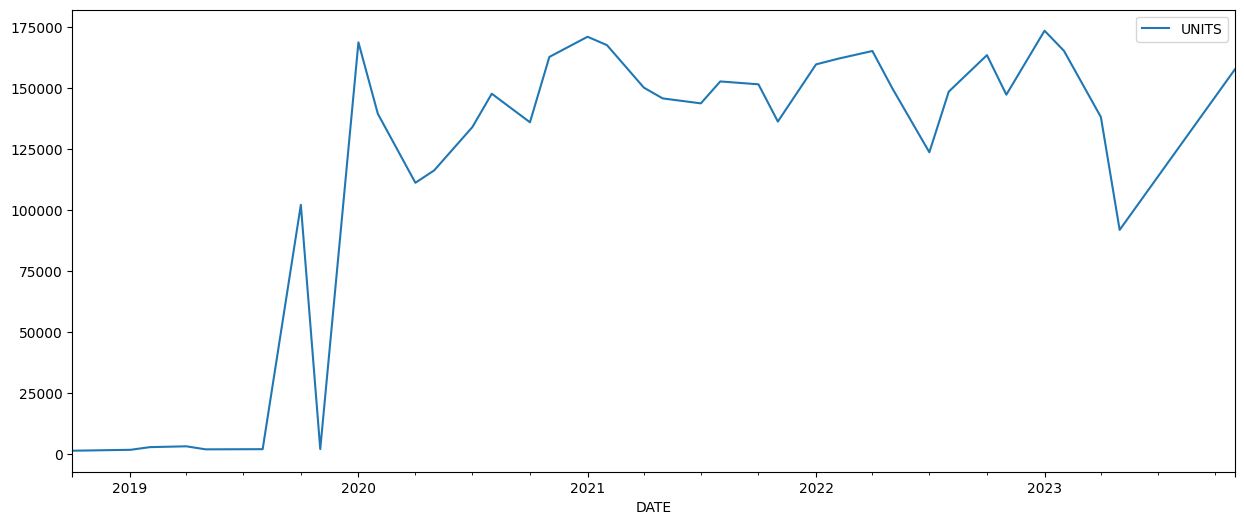

FOR REVENUE:


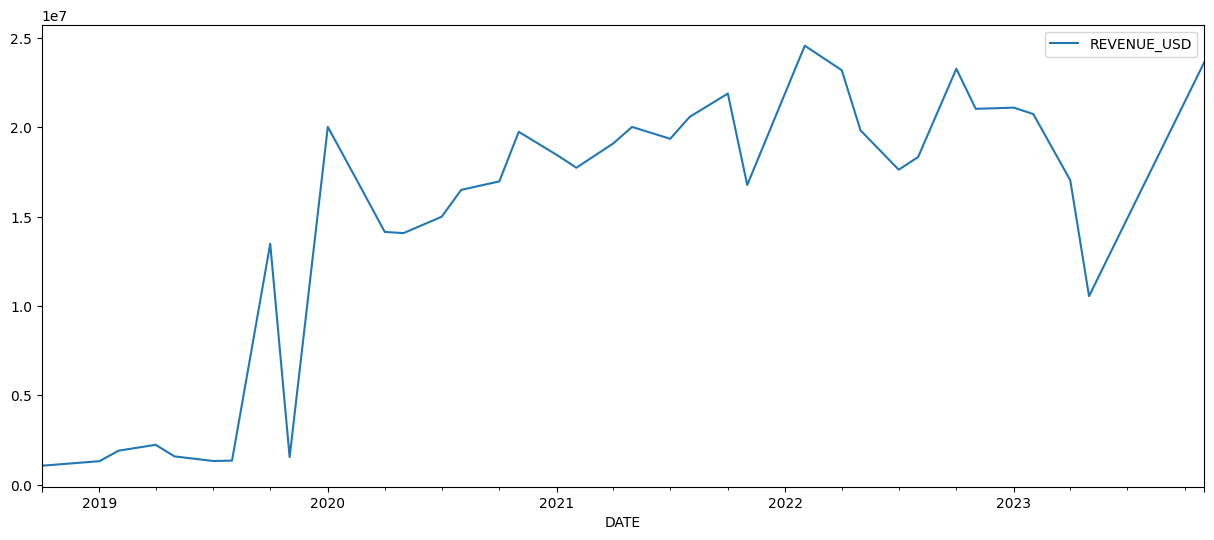

In [ ]:
import matplotlib.pyplot as plt
df2 = df[['DATE','UNITS','REVENUE_USD']]
df2.set_index('DATE', inplace=True)
freq = 'D'  # Daily frequency
df_re = df2.resample(freq).agg({'UNITS': 'sum', 'REVENUE_USD': 'sum'})
df_re.replace(0, np.nan, inplace=True)
df_re['UNITS'].interpolate(method='linear', inplace=True)
df_re['REVENUE_USD'].interpolate(method='linear', inplace=True)
df_re_units = df_re.copy()
df_re_units = df_re_units.drop(['REVENUE_USD'], axis=1)
df_re_revenue = df_re.copy()
df_re_revenue = df_re_revenue.drop(['UNITS'], axis=1)
print("FOR UNITS:")
df_re_units.plot(figsize = (15, 6))
plt.show()
print("FOR REVENUE:")
df_re_revenue.plot(figsize = (15, 6))
plt.show()

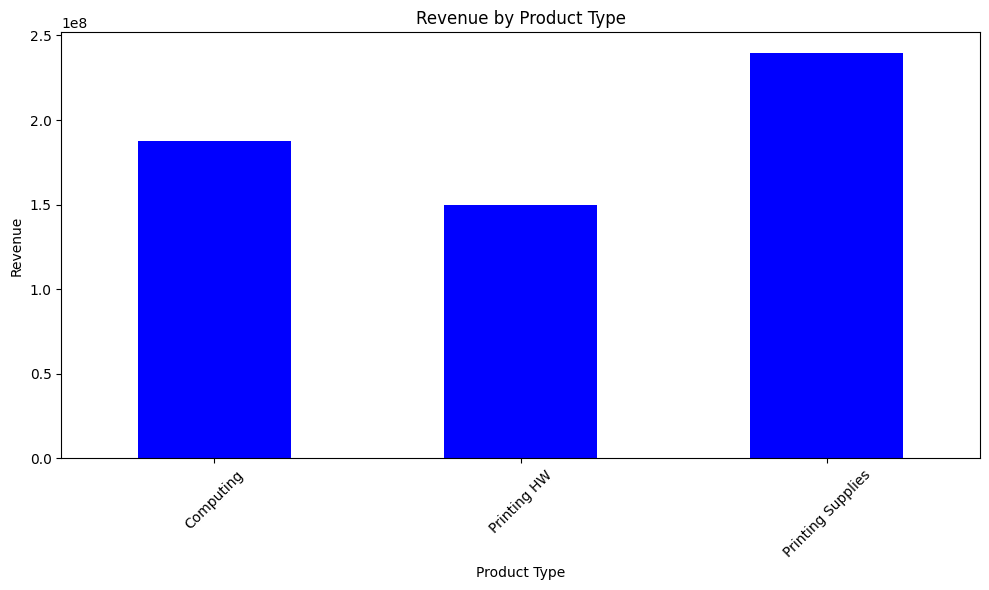

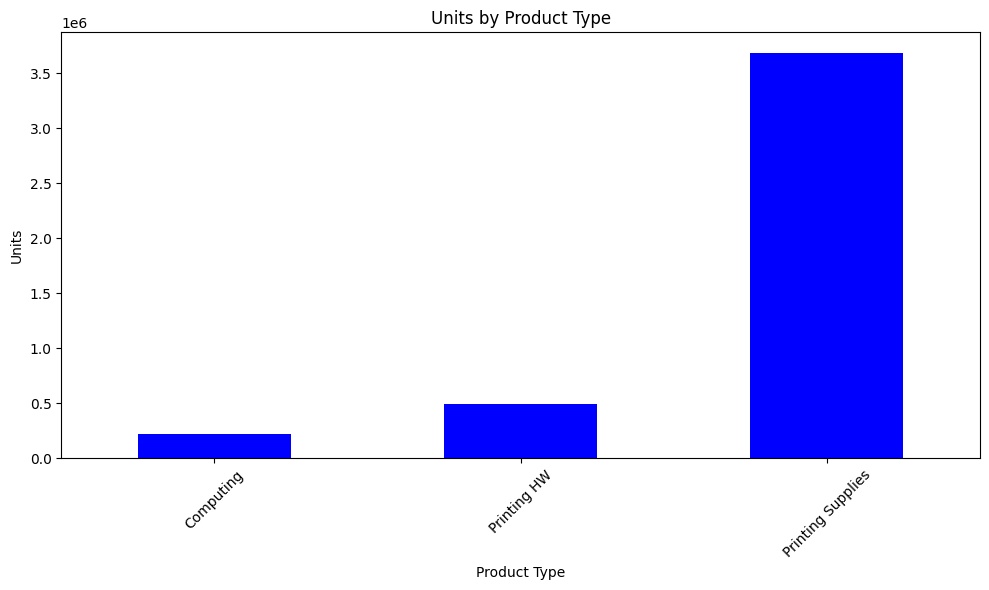

In [ ]:
import matplotlib.pyplot as plt
revenue_by_product = df.groupby('BUSINESS_UNIT')['REVENUE_USD'].sum()
plt.figure(figsize=(10, 6))
revenue_by_product.plot(kind='bar', color='blue')
plt.xlabel('Product Type')
plt.ylabel('Revenue')
plt.title('Revenue by Product Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
print("")
revenue_by_product = df.groupby('BUSINESS_UNIT')['UNITS'].sum()
plt.figure(figsize=(10, 6))
revenue_by_product.plot(kind='bar', color='blue')
plt.xlabel('Product Type')
plt.ylabel('Units')
plt.title('Units by Product Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

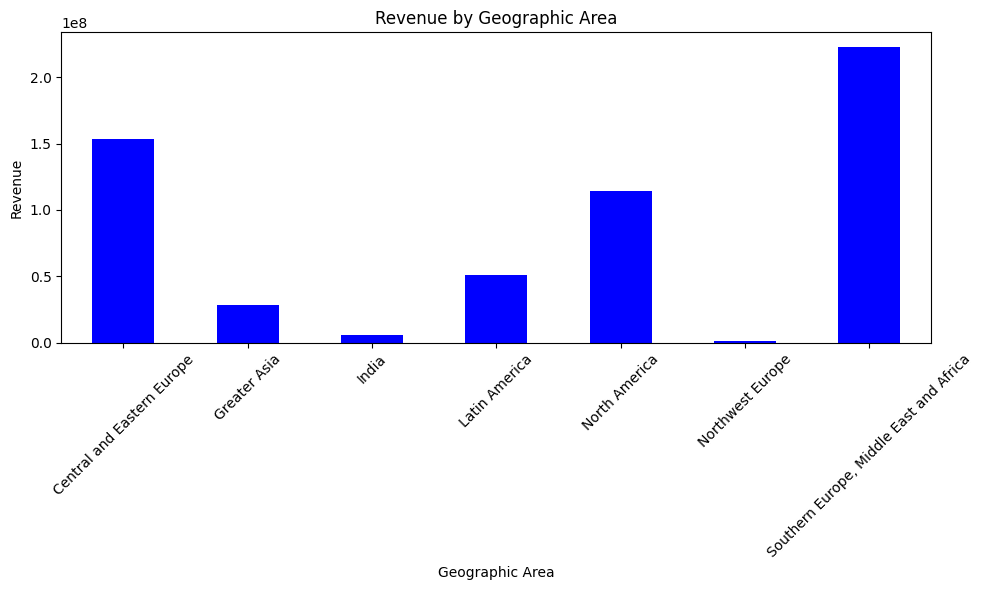

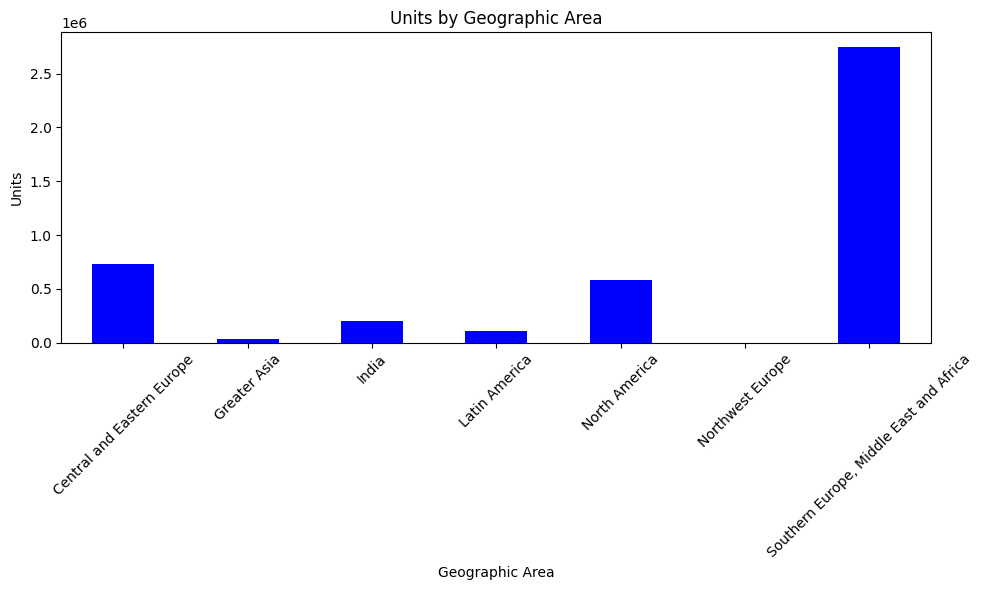

In [ ]:
import matplotlib.pyplot as plt
revenue_by_product = df.groupby('PARTNER_MARKET')['REVENUE_USD'].sum()
plt.figure(figsize=(10, 6))
revenue_by_product.plot(kind='bar', color='blue')
plt.xlabel('Geographic Area')
plt.ylabel('Revenue')
plt.title('Revenue by Geographic Area')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
print("")
revenue_by_product = df.groupby('PARTNER_MARKET')['UNITS'].sum()
plt.figure(figsize=(10, 6))
revenue_by_product.plot(kind='bar', color='blue')
plt.xlabel('Geographic Area')
plt.ylabel('Units')
plt.title('Units by Geographic Area')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

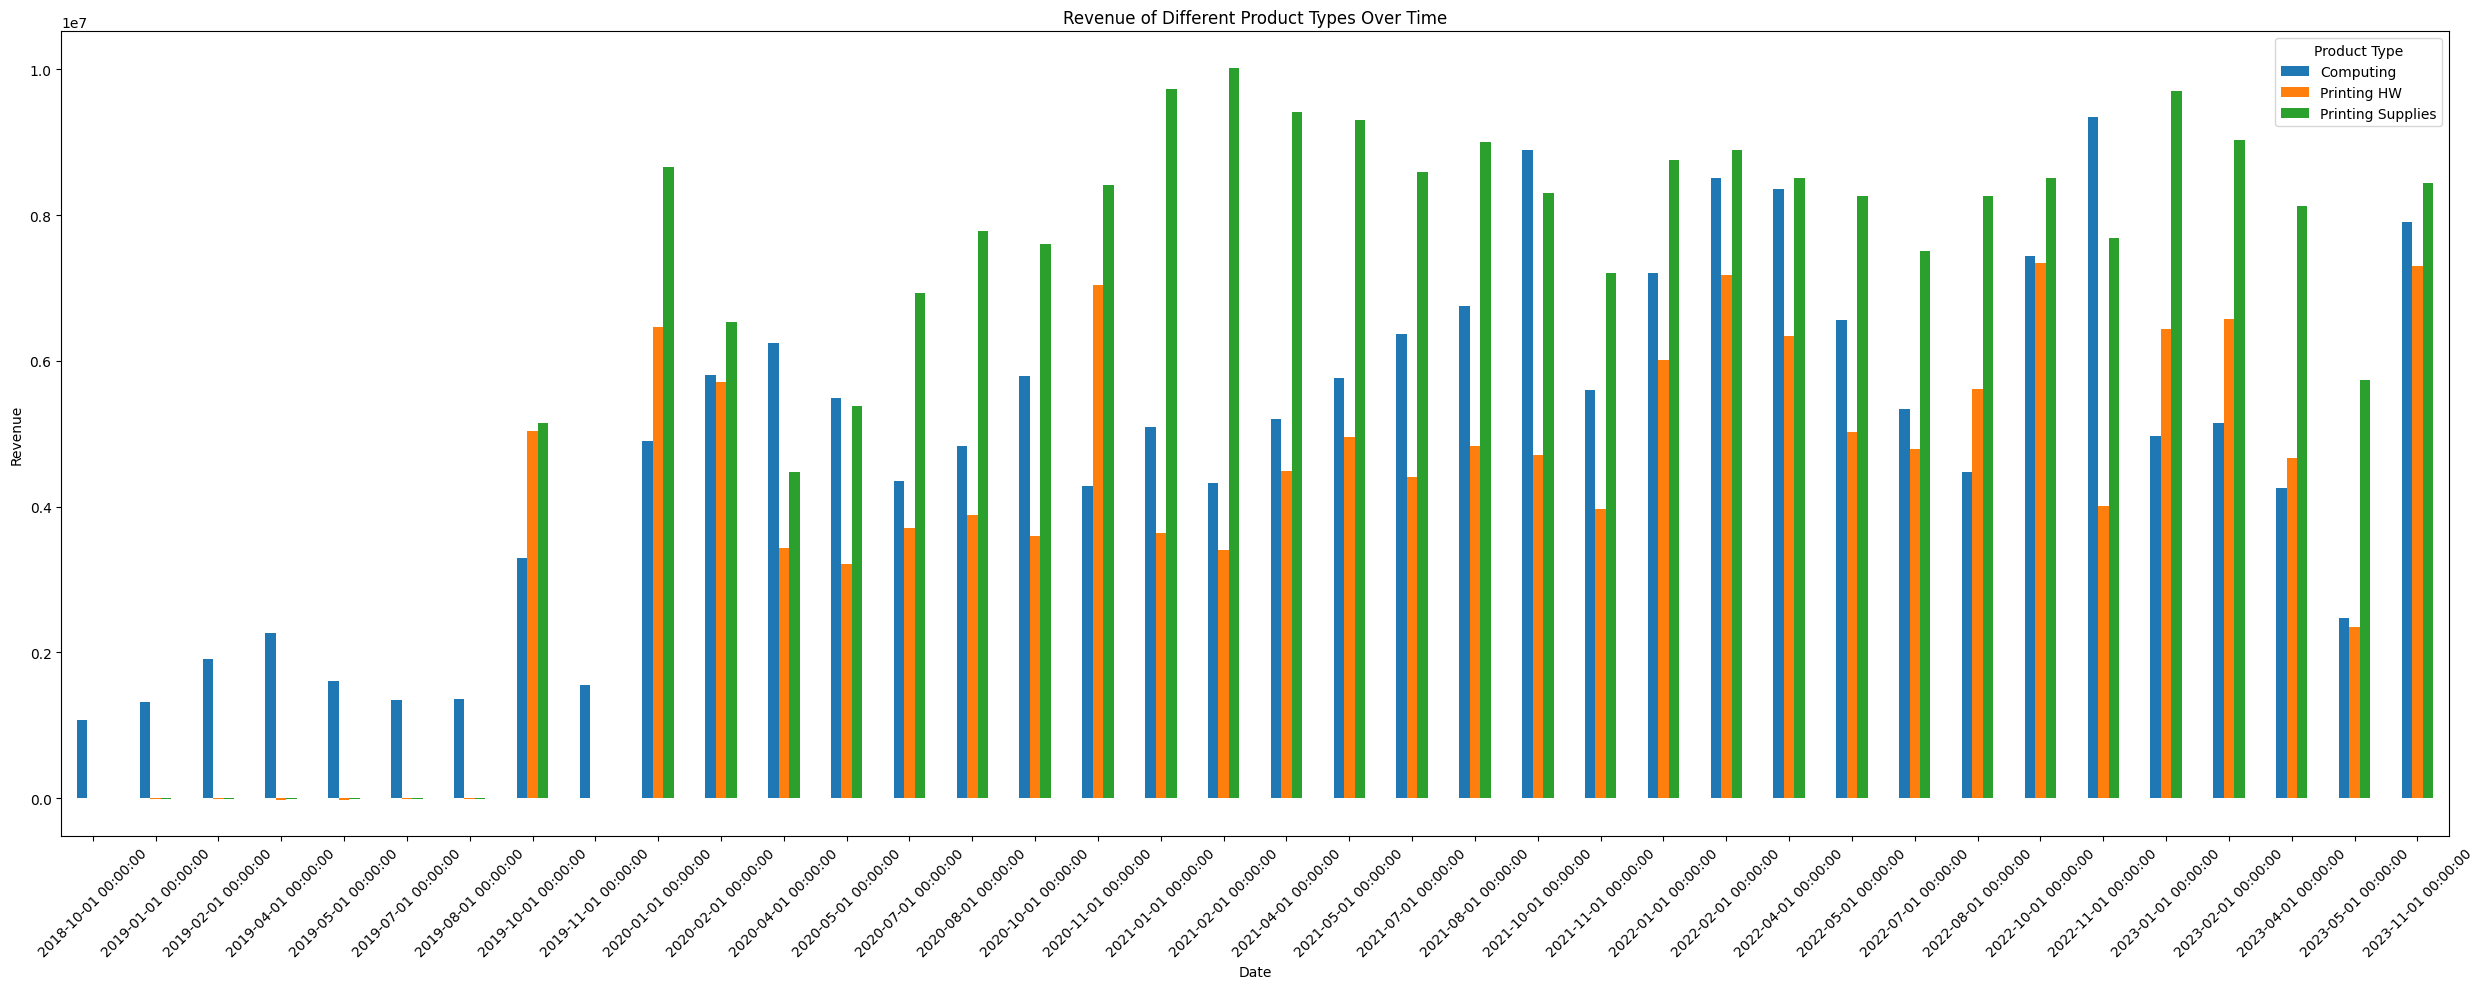

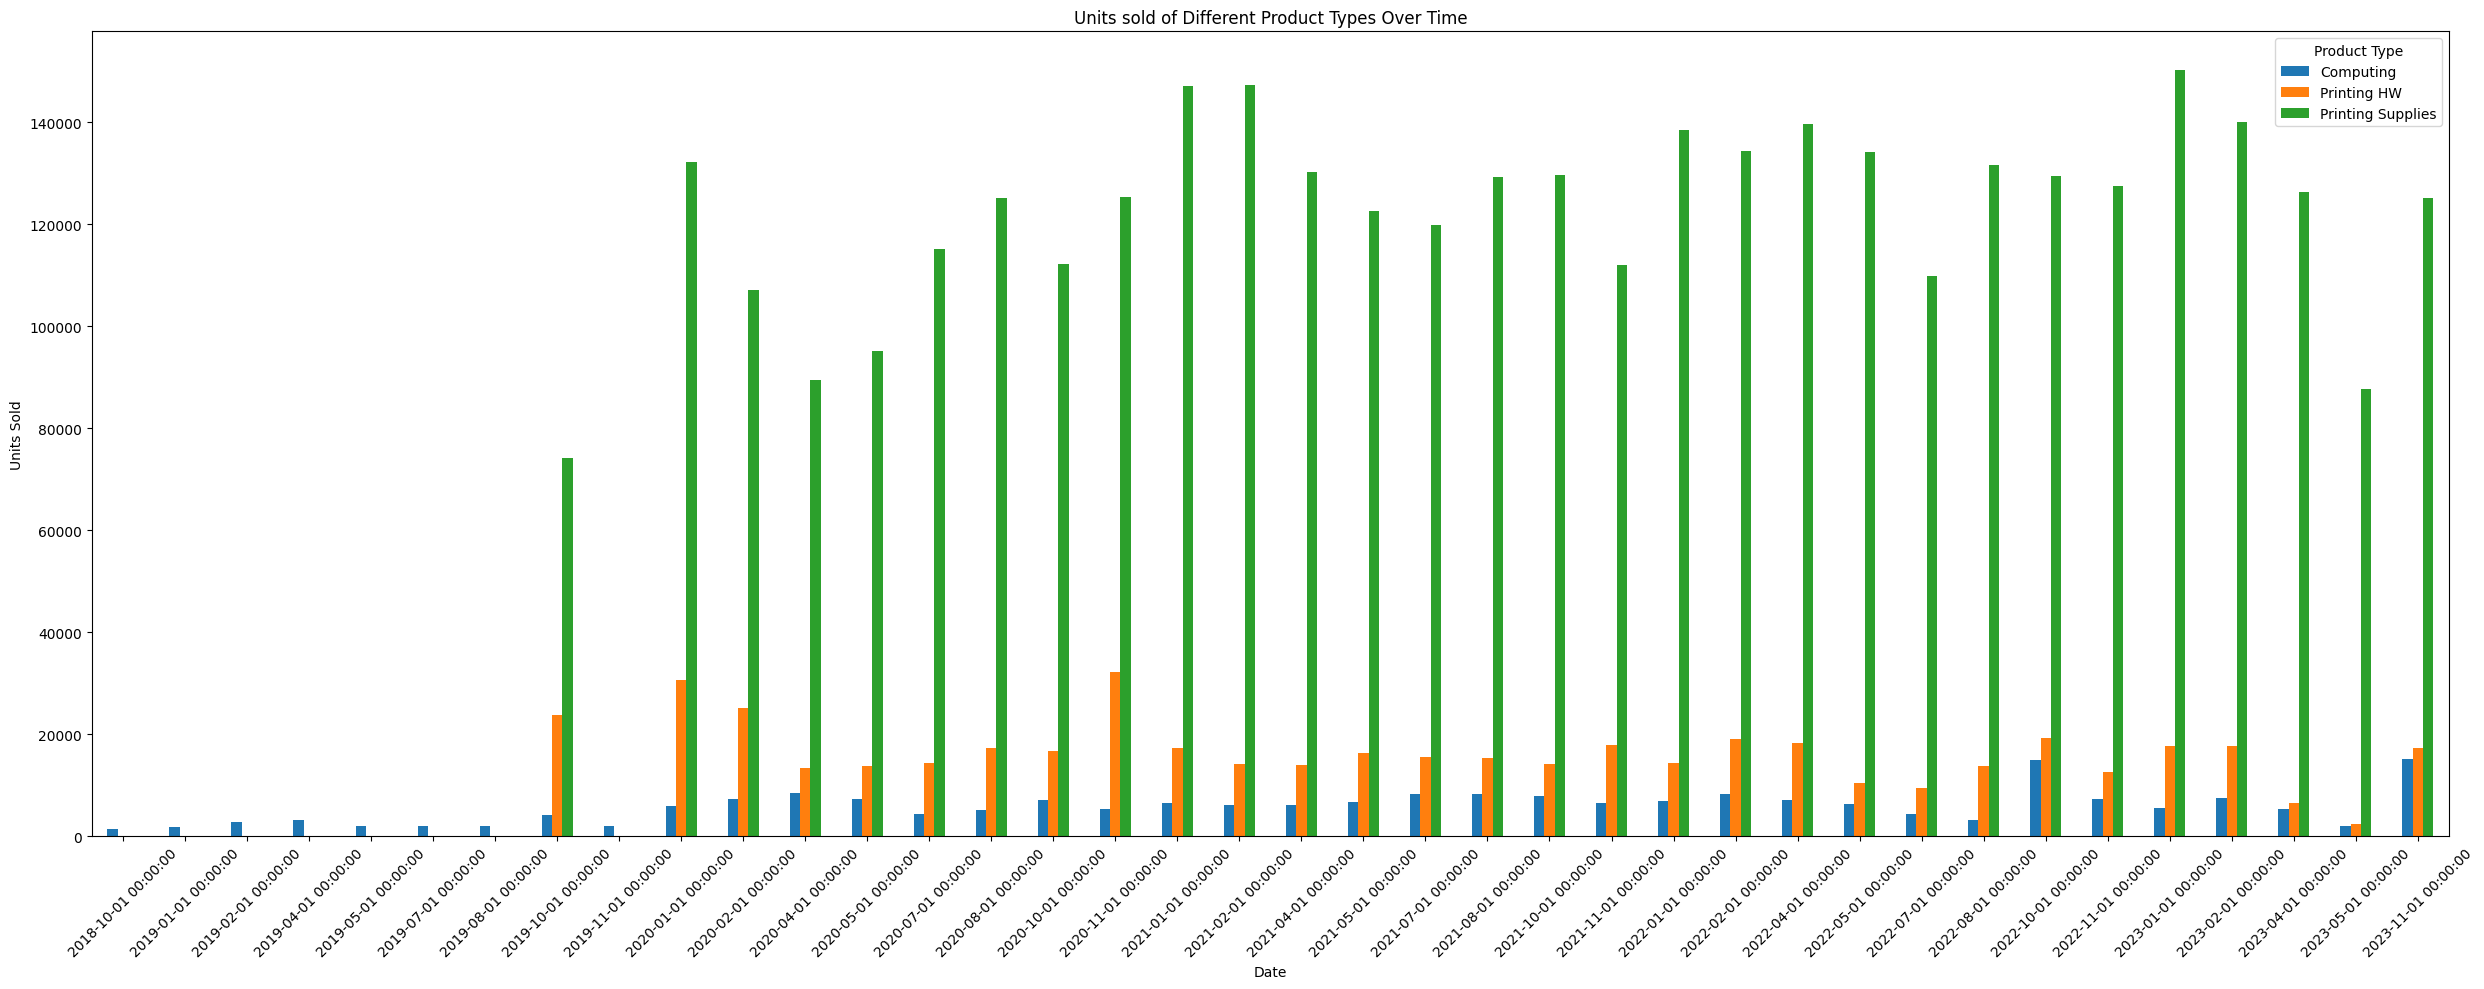

In [ ]:
import matplotlib.pyplot as plt
# Group the data by date and product type, and sum the revenue
grouped_df = df.groupby(['DATE', 'BUSINESS_UNIT'])['REVENUE_USD'].sum().unstack()
# Create a grouped bar chart
#plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar')
plt.gcf().set_size_inches(25, 10)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue of Different Product Types Over Time')
plt.xticks(rotation=45)
plt.legend(title='Product Type')
plt.tight_layout()
plt.show()
print("")
# Group the data by date and product type, and sum the revenue
grouped_df = df.groupby(['DATE', 'BUSINESS_UNIT'])['UNITS'].sum().unstack()
# Create a grouped bar chart
#plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar')
plt.gcf().set_size_inches(25, 10)
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Units sold of Different Product Types Over Time')
plt.xticks(rotation=45)
plt.legend(title='Product Type')
plt.tight_layout()
plt.show()

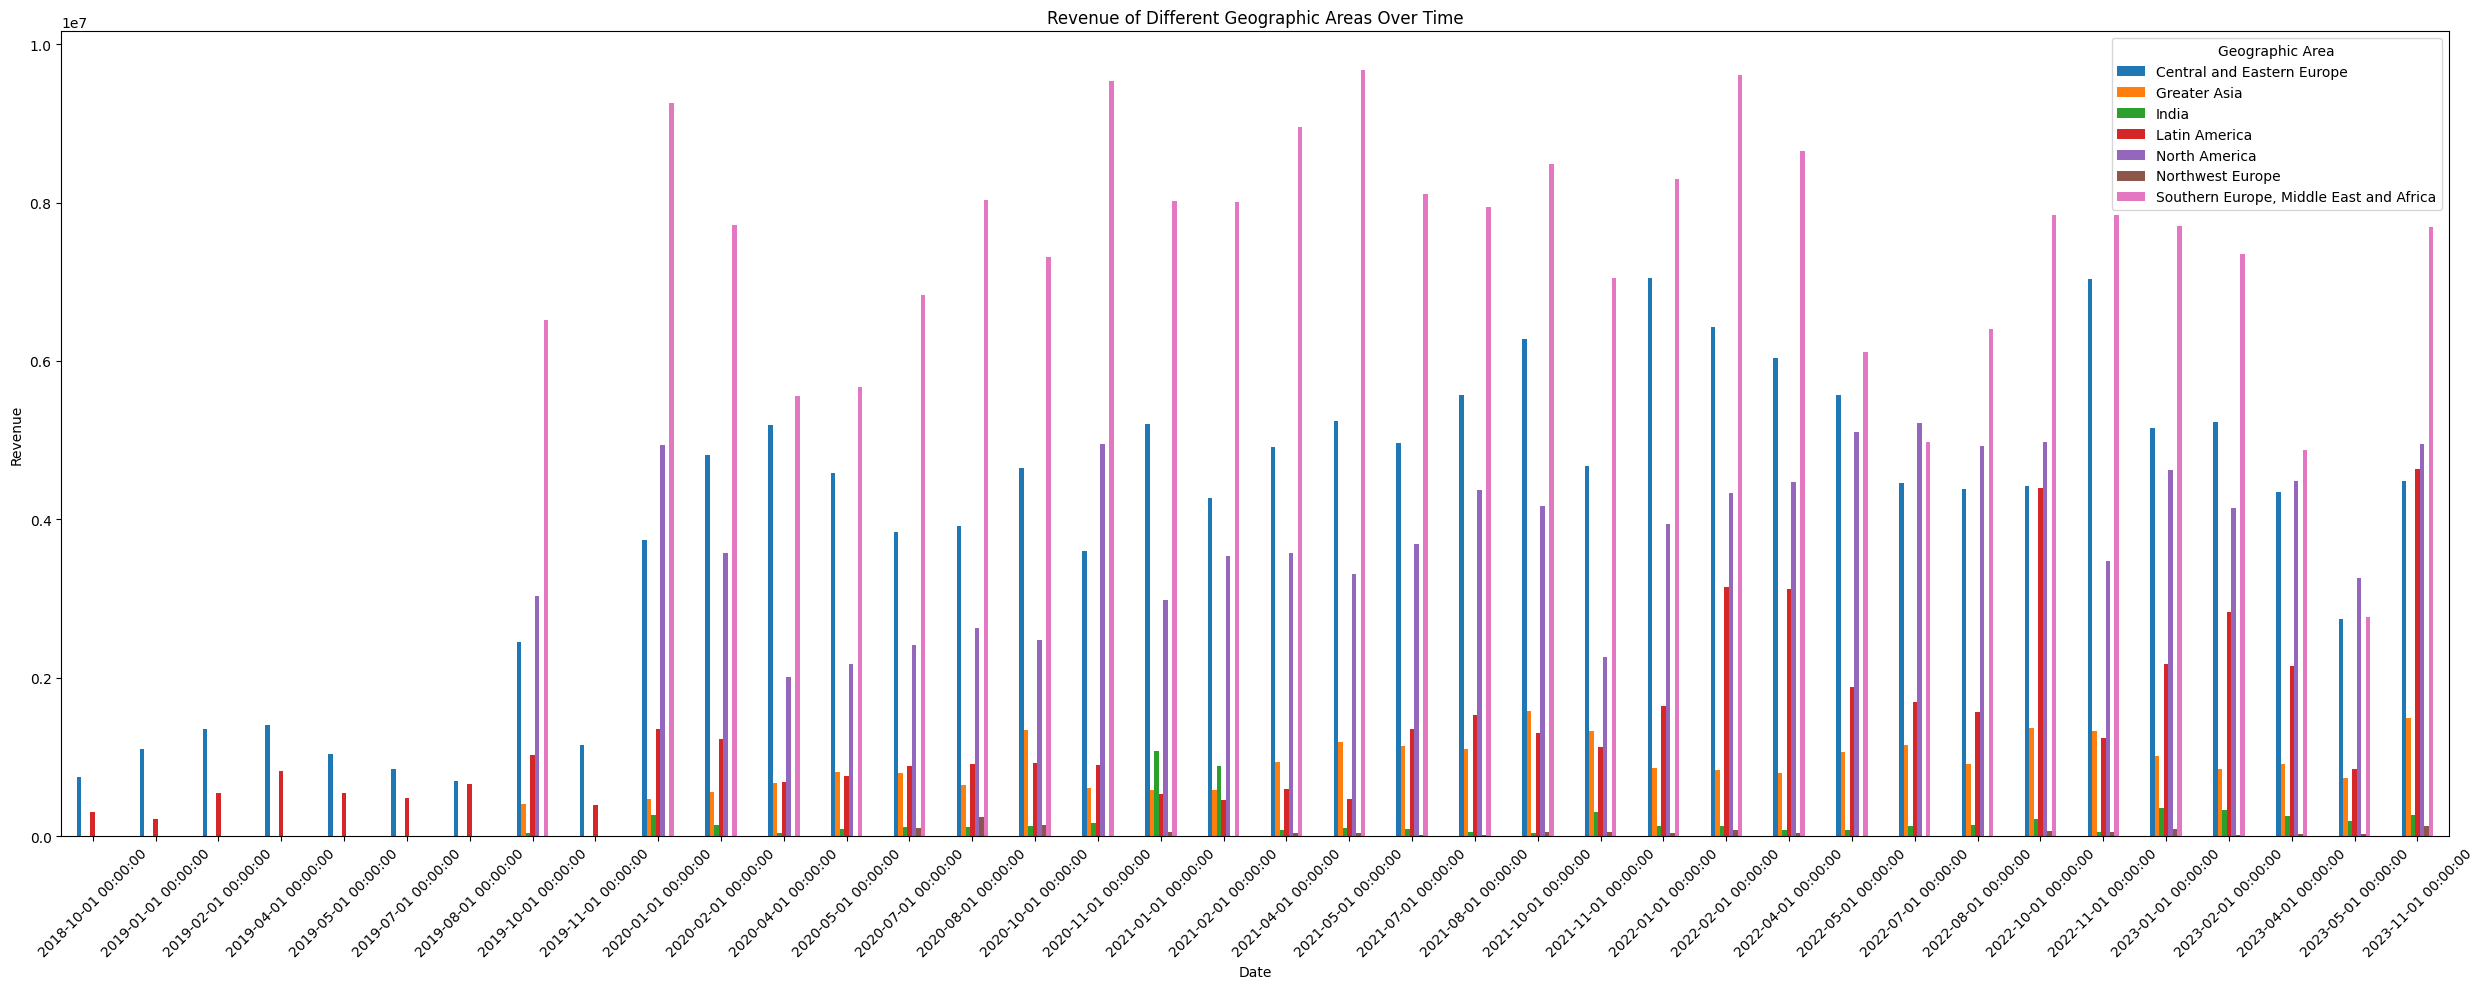

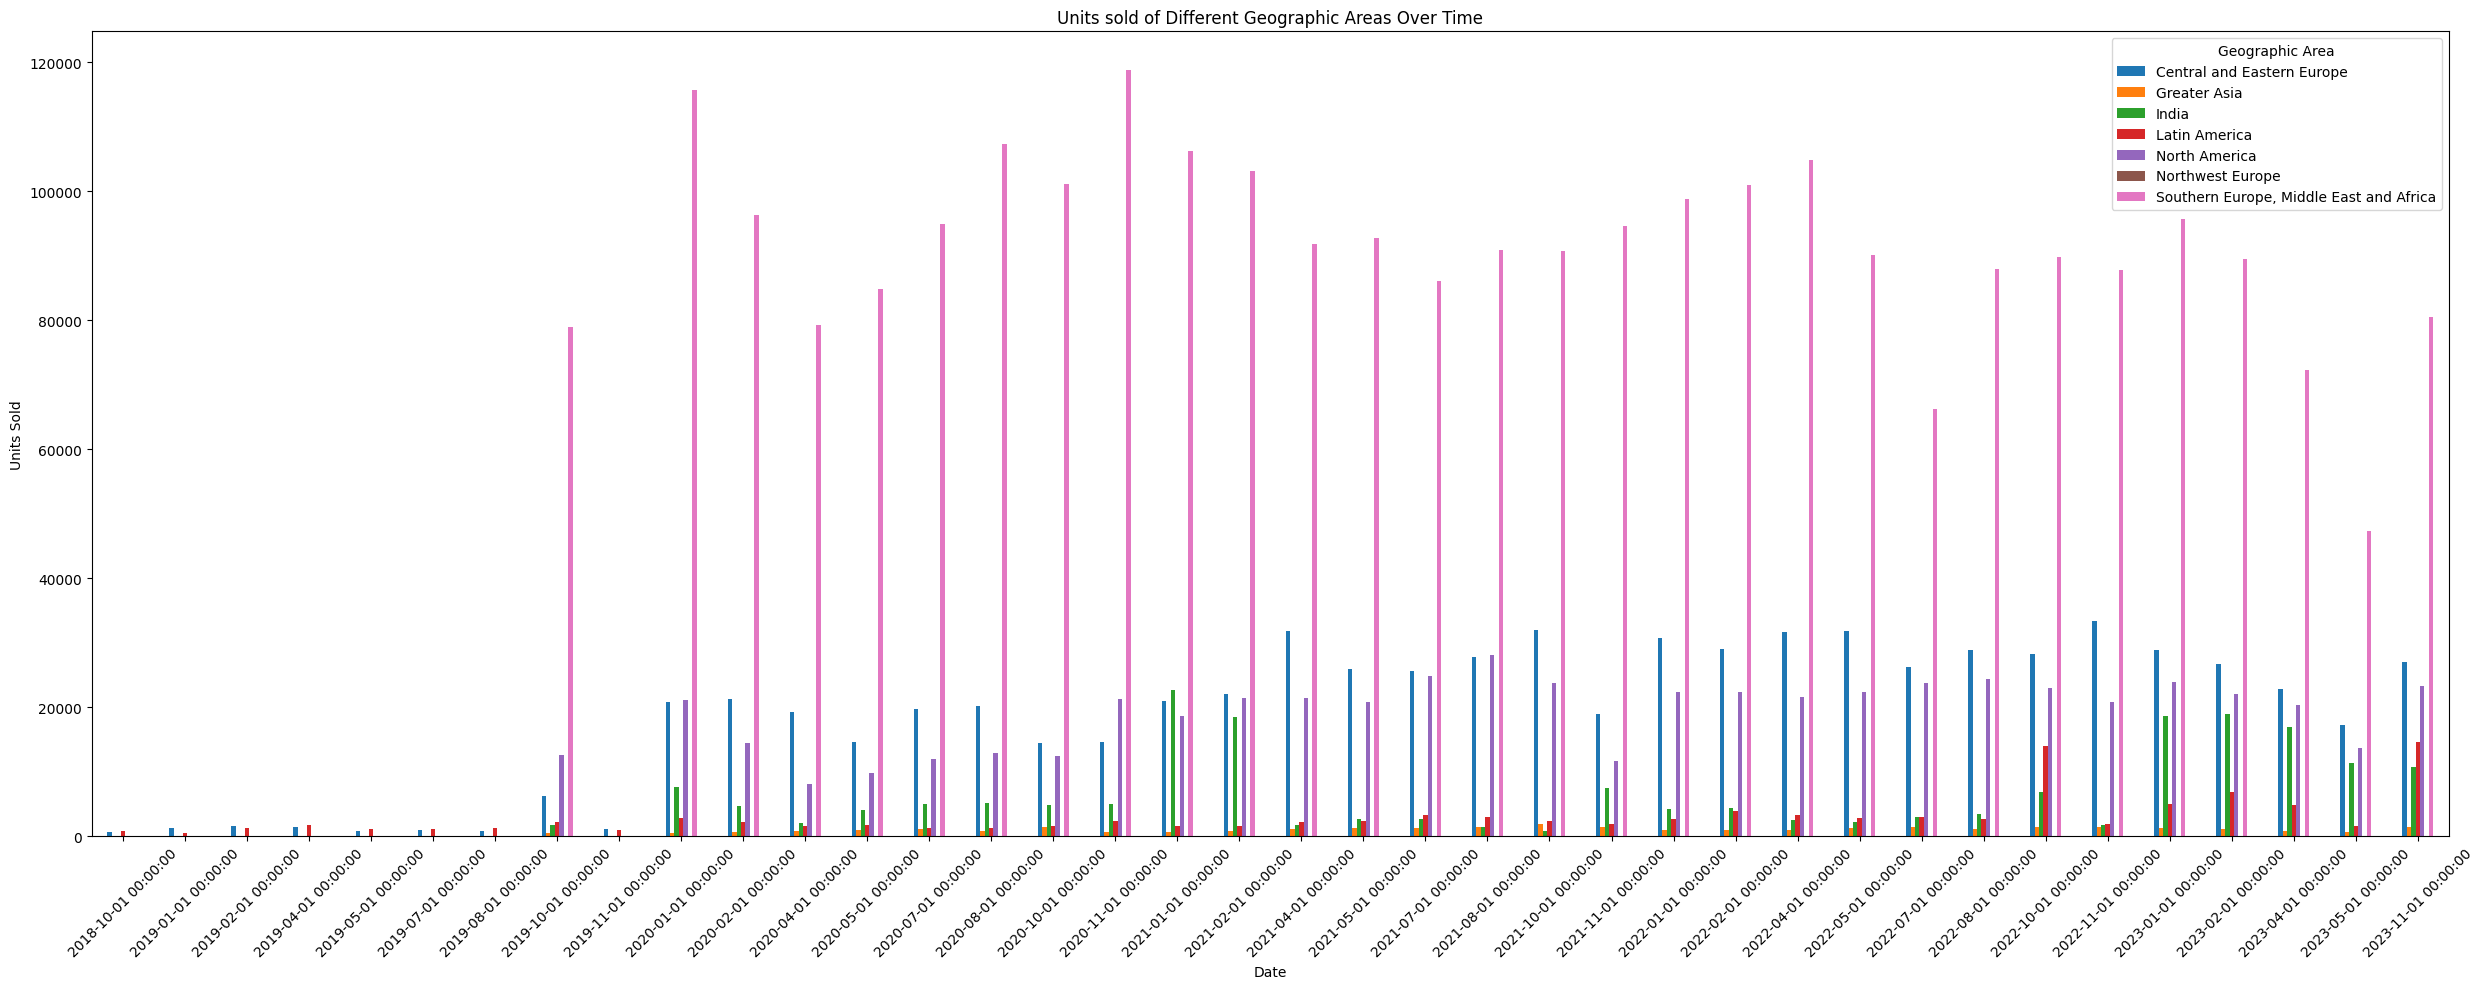

In [ ]:
# Group the data by date and product type, and sum the revenue
grouped_df = df.groupby(['DATE', 'PARTNER_MARKET'])['REVENUE_USD'].sum().unstack()
# Create a grouped bar chart
#plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar')
plt.gcf().set_size_inches(25, 10)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue of Different Geographic Areas Over Time')
plt.xticks(rotation=45)
plt.legend(title='Geographic Area')
plt.tight_layout()
plt.show()
print("")
# Group the data by date and product type, and sum the revenue
grouped_df = df.groupby(['DATE', 'PARTNER_MARKET'])['UNITS'].sum().unstack()
# Create a grouped bar chart
#plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar')
plt.gcf().set_size_inches(25, 10)
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Units sold of Different Geographic Areas Over Time')
plt.xticks(rotation=45)
plt.legend(title='Geographic Area')
plt.tight_layout()
plt.show()

#### Pareto Chart:

FOR REVENUE:

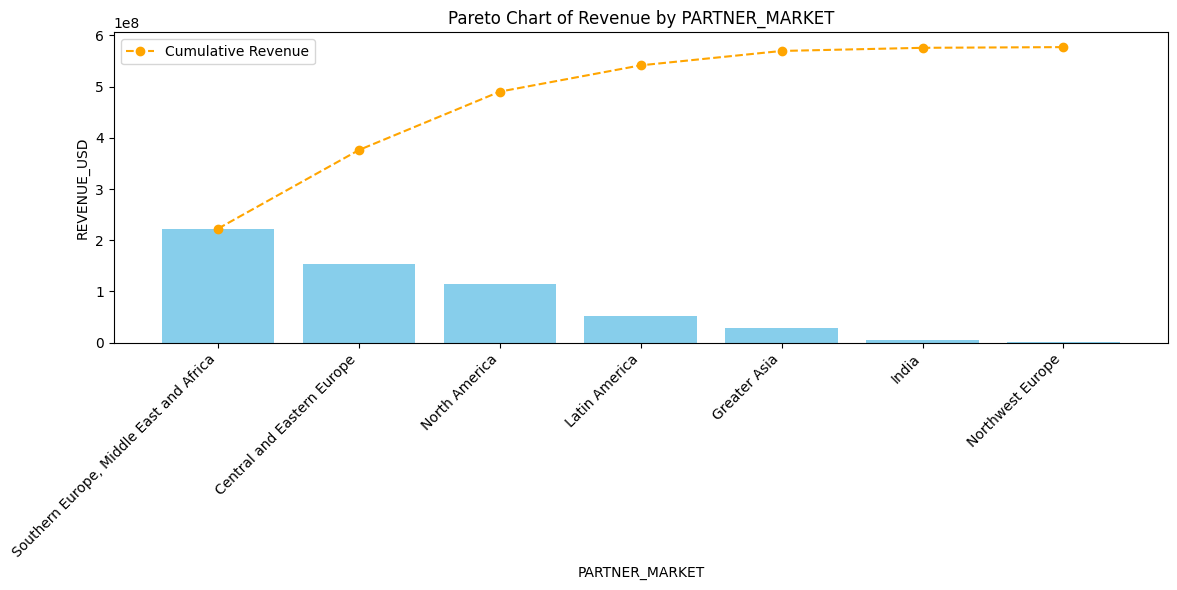

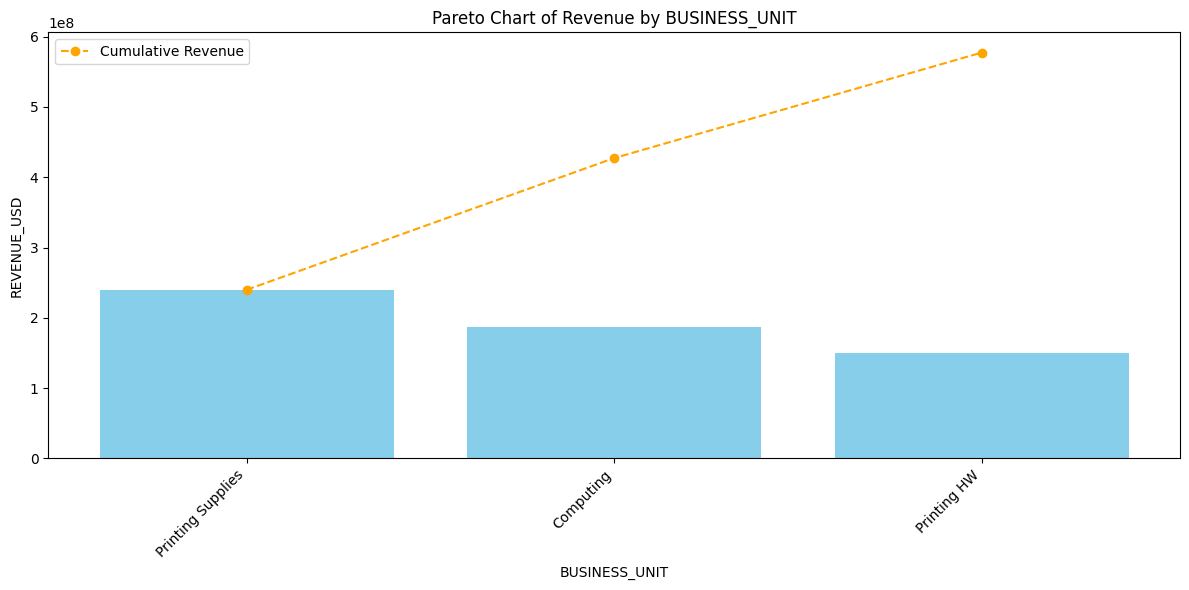

In [ ]:
def pareto_chart(dataframe, category_column, value_column, title):
    grouped = dataframe.groupby(category_column)[value_column].sum().reset_index()
    sorted_df = grouped.sort_values(by=value_column, ascending=False)
    sorted_df['Cumulative Revenue'] = sorted_df[value_column].cumsum()
    plt.figure(figsize=(12, 6))
    #plt.bar(sorted_df.index, sorted_df[value_column], tick_label=sorted_df[category_column], color='skyblue')
    plt.bar(sorted_df[category_column],sorted_df[value_column], color='skyblue')
    #plt.plot(sorted_df['Cumulative Revenue'], color='orange', marker='o', linestyle='--')
    plt.plot(sorted_df[category_column],sorted_df['Cumulative Revenue'], color='orange', marker='o', linestyle='--')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(category_column)
    plt.ylabel(value_column)
    plt.title(title)
    plt.legend(['Cumulative Revenue'], loc='upper left')
    plt.tight_layout()
    plt.show()

pareto_chart(df, 'PARTNER_MARKET', 'REVENUE_USD', 'Pareto Chart of Revenue by PARTNER_MARKET')
print("")
# Create a Pareto chart for product units
pareto_chart(df, 'BUSINESS_UNIT', 'REVENUE_USD', 'Pareto Chart of Revenue by BUSINESS_UNIT')

<ipython-input-34-fac06097e4ad>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_df[combined_category_column], rotation=45, ha='right')


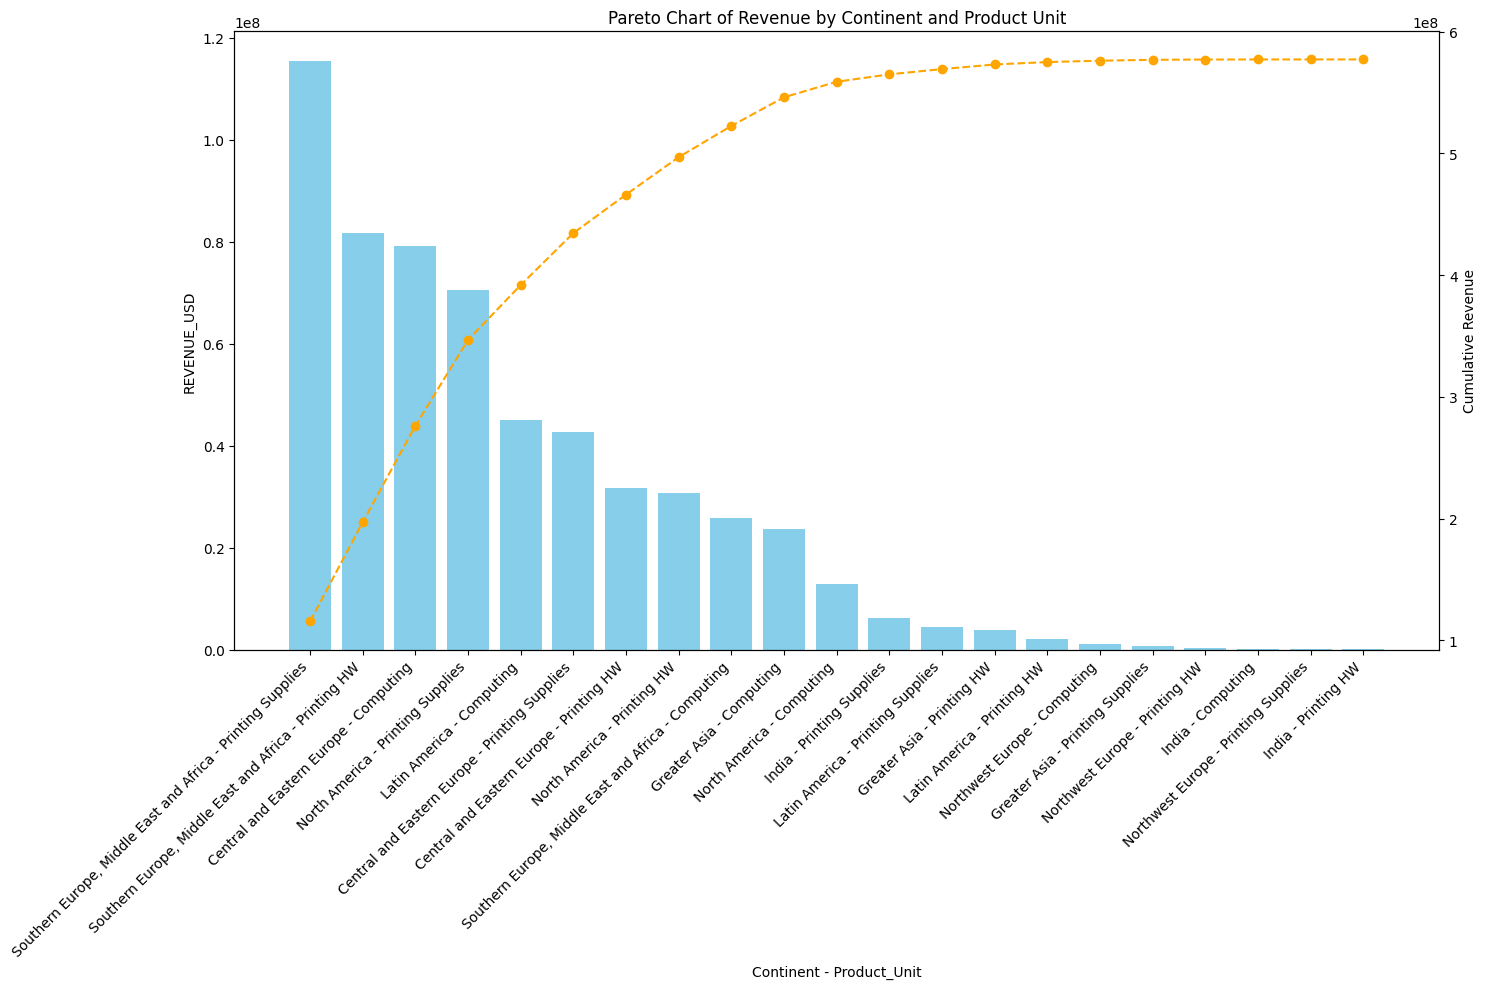

In [ ]:
def plot_pareto(data, combined_category_column, value_column, title):
    data[combined_category_column] = data['PARTNER_MARKET'] + ' - ' + data['BUSINESS_UNIT']

    grouped = data.groupby(combined_category_column)[value_column].sum().reset_index()

    # Sort the data by revenue in descending order
    sorted_df = grouped.sort_values(by=value_column, ascending=False)

    # Calculate cumulative revenue
    sorted_df['Cumulative Revenue'] = sorted_df[value_column].cumsum()

    # Create the Pareto chart
    plt.figure(figsize=(15, 10))
    ax = plt.gca()
    ax.bar(sorted_df[combined_category_column], sorted_df[value_column], color='skyblue')
    ax2 = ax.twinx()
    ax2.plot(sorted_df[combined_category_column], sorted_df['Cumulative Revenue'], color='orange', marker='o', linestyle='--')
    ax.set_xticklabels(sorted_df[combined_category_column], rotation=45, ha='right')
    ax.set_xlabel(combined_category_column)
    ax.set_ylabel(value_column)
    ax2.set_ylabel('Cumulative Revenue')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Call the function to create a Pareto chart combining 'Continent' and 'Product_Unit'
plot_pareto(df, 'Continent - Product_Unit', 'REVENUE_USD', 'Pareto Chart of Revenue by Continent and Product Unit')

FOR UNITS SOLD:

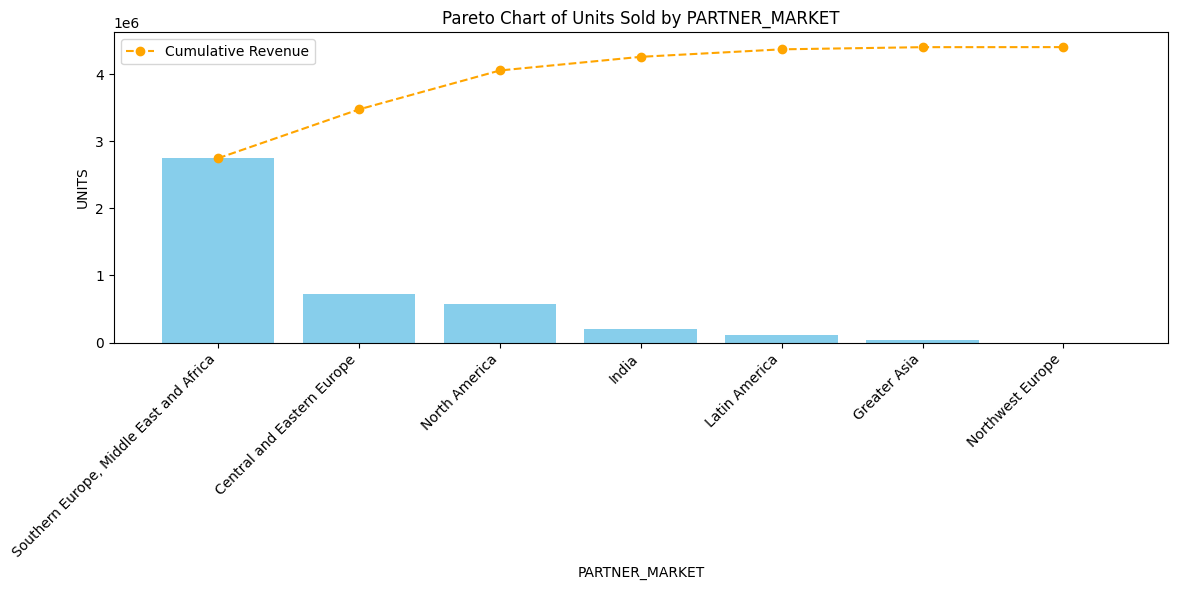

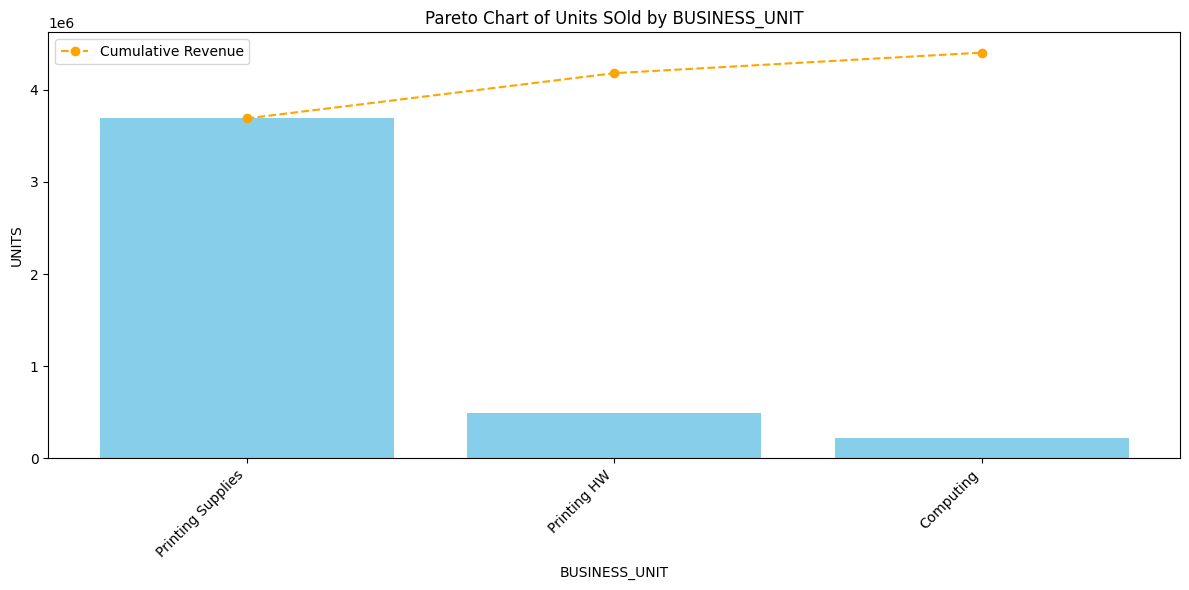

In [ ]:
pareto_chart(df, 'PARTNER_MARKET', 'UNITS', 'Pareto Chart of Units Sold by PARTNER_MARKET')
print("")
# Create a Pareto chart for product units
pareto_chart(df, 'BUSINESS_UNIT', 'UNITS', 'Pareto Chart of Units SOld by BUSINESS_UNIT')

<ipython-input-34-fac06097e4ad>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_df[combined_category_column], rotation=45, ha='right')


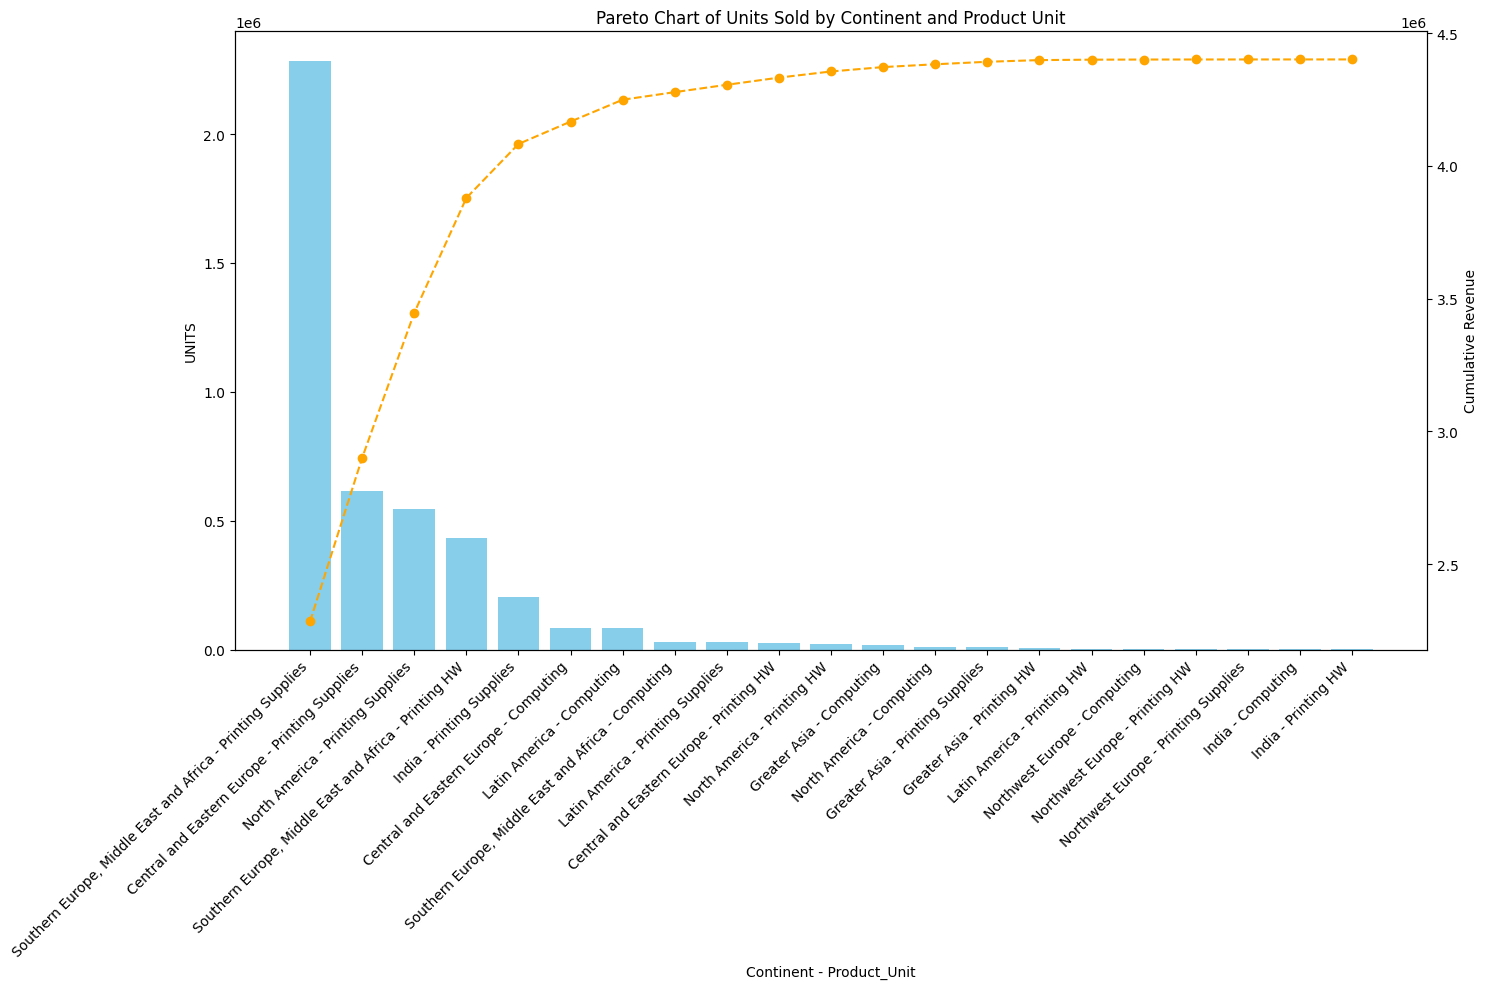

In [ ]:
# Call the function to create a Pareto chart combining 'Continent' and 'Product_Unit'
plot_pareto(df, 'Continent - Product_Unit', 'UNITS', 'Pareto Chart of Units Sold by Continent and Product Unit')

### Time - Forecasting:

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
def arima_func(dataframe):
  df2 = dataframe[['DATE','UNITS','REVENUE_USD']]
  df2.set_index('DATE', inplace=True)
  freq = 'D'  # Daily frequency
  df_re = df2.resample(freq).agg({'UNITS': 'sum', 'REVENUE_USD': 'sum'})
  df_re.replace(0, np.nan, inplace=True)
  df_re['UNITS'].interpolate(method='linear', inplace=True)
  df_re['REVENUE_USD'].interpolate(method='linear', inplace=True)
  train_size = int(0.75 * len(df_re))
  train, test = df_re.iloc[:train_size], df_re.iloc[train_size:]
  # Forecast future demand
  ord = (5, 1, 0)
  model = ARIMA(train['UNITS'], order=ord)
  model_fit = model.fit()
  forecast_steps = len(test)
  forecast = model_fit.forecast(steps=forecast_steps)
  plt.figure(figsize=(6, 3))
  plt.plot(train.index, train['UNITS'], label='Train Data')
  plt.plot(test.index, test['UNITS'], label='Test Data')
  plt.plot(test.index, forecast, label='Forecast')
  plt.xlabel('Date')
  plt.ylabel('Units')
  plt.title('ARIMA Forecast for Units')
  plt.legend()
  plt.show()
  mape = mean_absolute_percentage_error(test['UNITS'], forecast)
  print(f"Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: {mape:.2f}%")
  # Forecast future Revenue
  ord = (5, 1, 0)
  model = ARIMA(train['REVENUE_USD'], order=ord)
  model_fit = model.fit()
  forecast_steps = len(test)
  forecast = model_fit.forecast(steps=forecast_steps)
  plt.figure(figsize=(6, 3))
  plt.plot(train.index, train['REVENUE_USD'], label='Train Data')
  plt.plot(test.index, test['REVENUE_USD'], label='Test Data')
  plt.plot(test.index, forecast, label='Forecast')
  plt.xlabel('Date')
  plt.ylabel('Revenue')
  plt.title('ARIMA Forecast for Revenue')
  plt.legend()
  plt.show()
  mape = mean_absolute_percentage_error(test['REVENUE_USD'], forecast)
  print(f"Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: {mape:.2f}%")

#### BU:


--------------------FOR THE BUSINESS UNIT: Printing Supplies ----------------------------


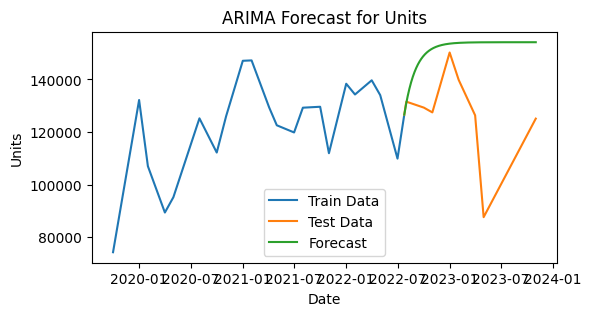

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.27%


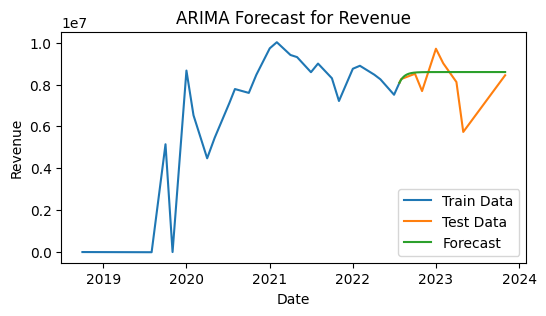

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.13%

--------------------FOR THE BUSINESS UNIT: Printing HW ----------------------------


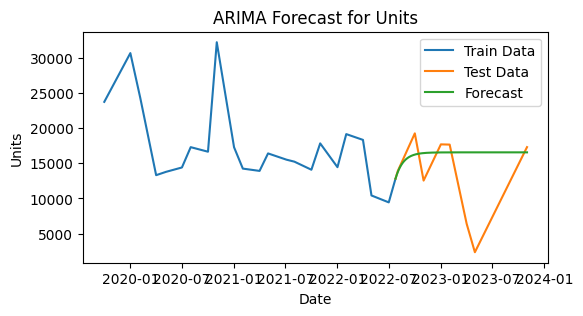

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.77%


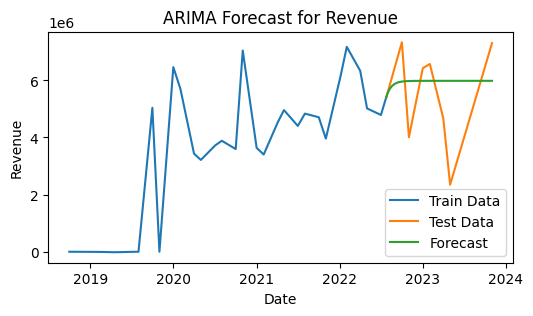

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.28%

--------------------FOR THE BUSINESS UNIT: Computing ----------------------------


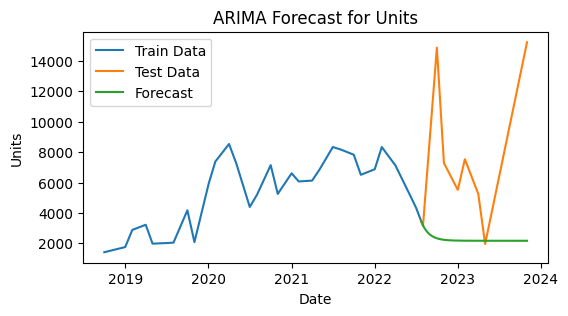

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.64%


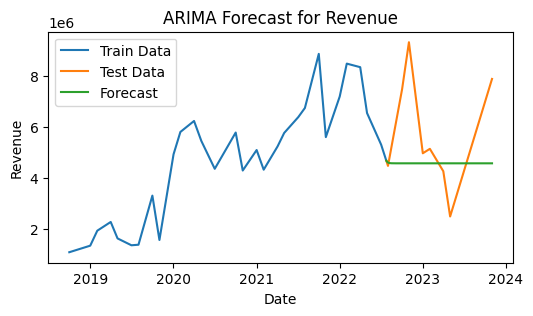

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.25%


In [ ]:
for i in BU:
  print('')
  print('--------------------FOR THE BUSINESS UNIT:', i, '----------------------------')
  dft = df[df['BUSINESS_UNIT'] == i]
  arima_func(dft)

#### MARKET:


--------------------FOR THE PARTNER MARKET: North America ----------------------------


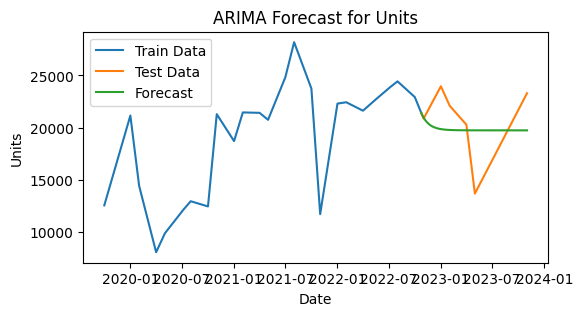

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.13%


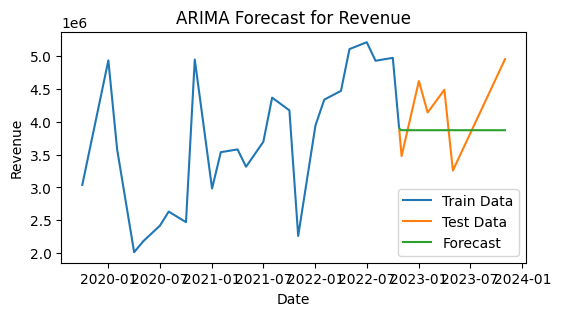

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.10%

--------------------FOR THE PARTNER MARKET: Latin America ----------------------------


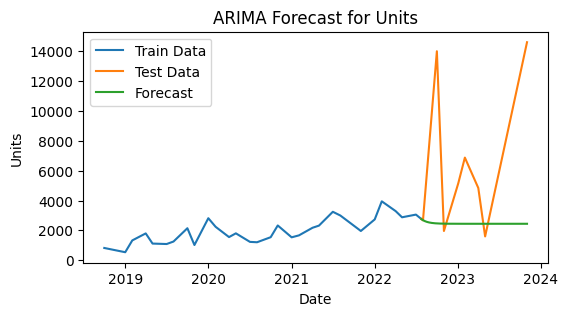

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.54%


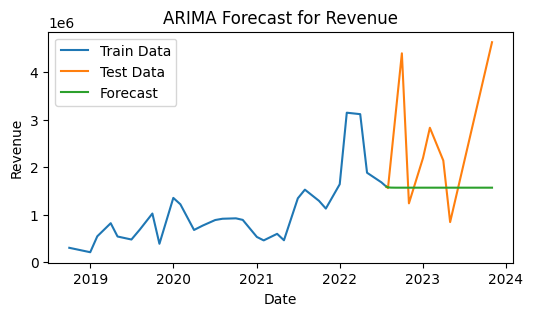

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.36%

--------------------FOR THE PARTNER MARKET: Greater Asia ----------------------------


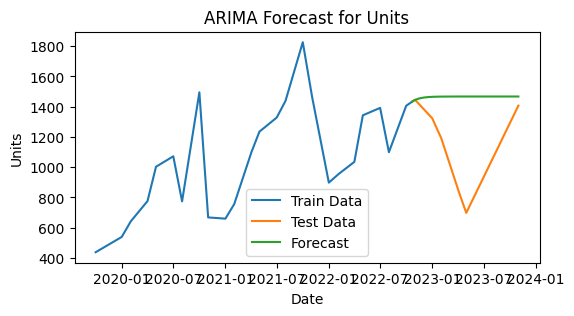

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.39%


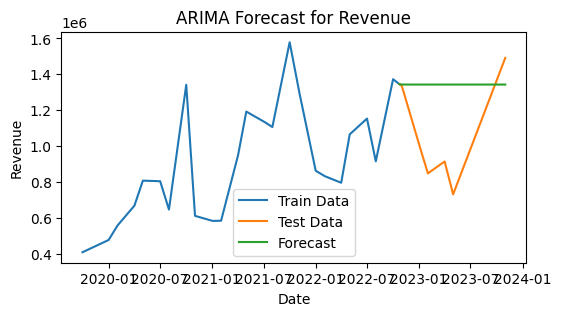

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.33%

--------------------FOR THE PARTNER MARKET: India ----------------------------


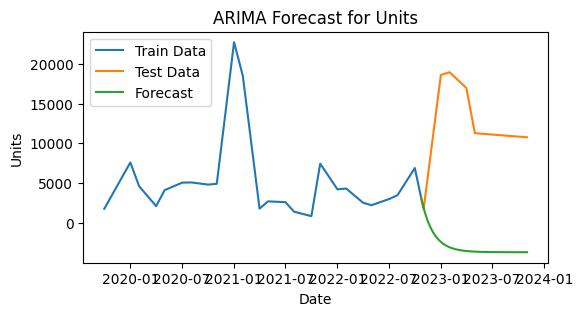

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 1.20%


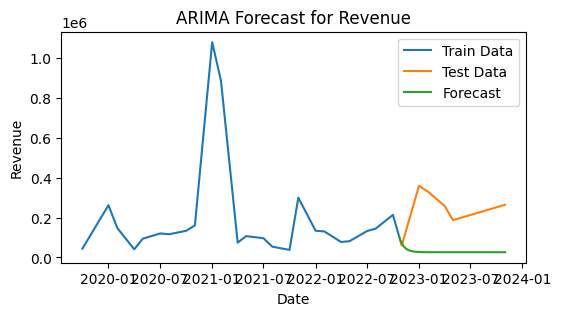

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.85%

--------------------FOR THE PARTNER MARKET: Central and Eastern Europe ----------------------------


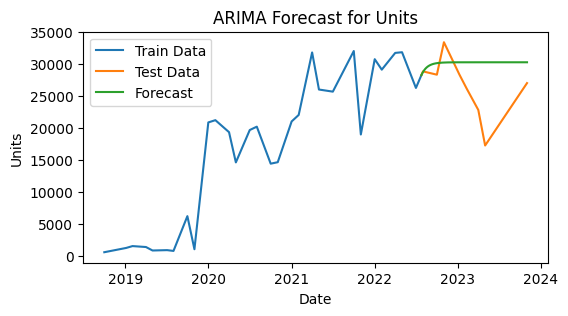

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.24%


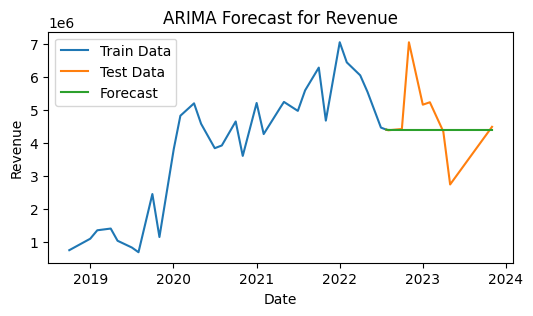

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.18%

--------------------FOR THE PARTNER MARKET: Southern Europe, Middle East and Africa ----------------------------


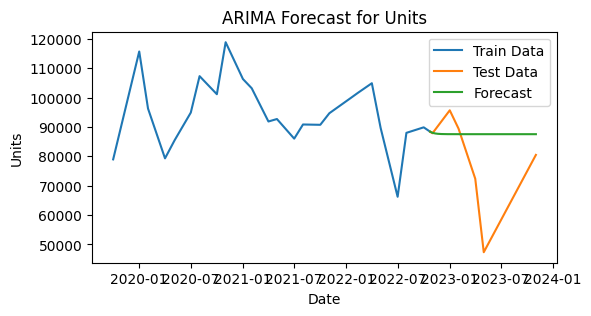

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.26%


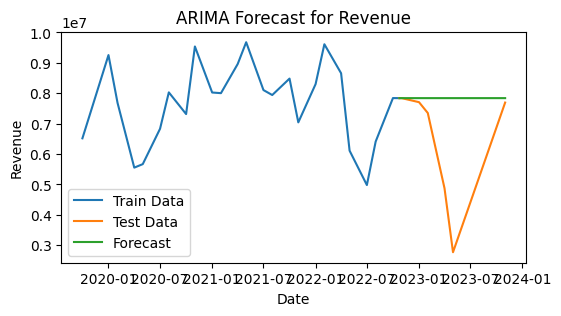

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.45%

--------------------FOR THE PARTNER MARKET: Northwest Europe ----------------------------


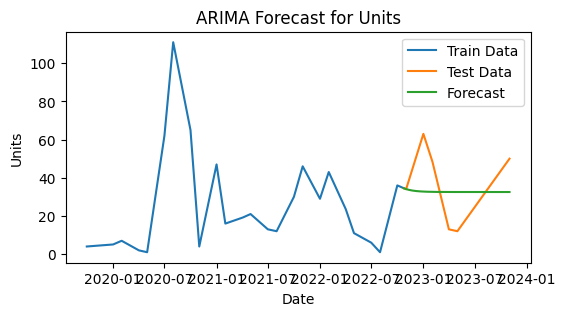

Mean Absolute Percentage Error (MAPE) for FUTURE DEMAND: 0.47%


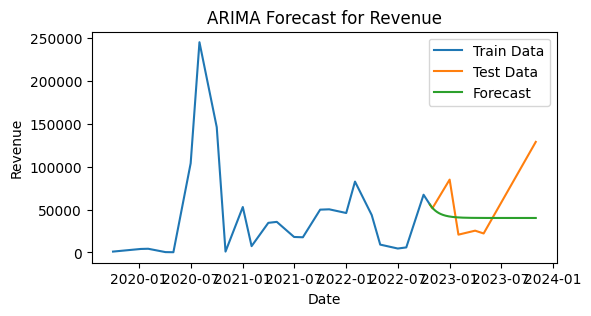

Mean Absolute Percentage Error (MAPE) for FUTURE REVENUE: 0.48%


In [ ]:
for i in MARKET:
  print('')
  print('--------------------FOR THE PARTNER MARKET:', i, '----------------------------')
  dft = df[df['PARTNER_MARKET'] == i]
  arima_func(dft)

### Customer Lifetime Value (CLV) Analysis:

In [ ]:
c_df = df.copy()
c_df

,DATA_FROM,BUSINESS_UNIT,PARTNER_MARKET,PRODUCT_CATEGORY,PARTNER_HQ_NAME,PARTNER_ID,PARTNER_CUSTOMER_ID,PARTNER_LEVEL,IS_OPSI,ONLINE_FLAG,PRODUCT_UNITS,REVENUE_USD,UNITS,DATE,Continent - Product_Unit
0,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,13690,Power Services,True,NaN,4.0,391.78,4.0,2020-01-01,North America - Printing Supplies
1,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,13438,Power Services,True,N,1.0,70.92,1.0,2023-04-01,North America - Printing Supplies
2,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,15330,Power Services,True,N,1.0,238.73,1.0,2022-10-01,North America - Printing Supplies
3,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,15322,Power Services,True,N,1.0,200.75,1.0,2023-01-01,North America - Printing Supplies
4,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,13521,Power Services,True,NaN,4.0,406.44,4.0,2020-10-01,North America - Printing Supplies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223150,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,67519,Power Services,True,N,3.0,500.36,3.0,2021-05-01,North America - Printing Supplies
223151,Sell-To,Printing Supplies,North America,OPS Toner Supplies,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,15303,Power Services,True,N,9.0,1612.35,9.0,2022-08-01,North America - Printing Supplies
223152,Sell-To,Printing HW,North America,Office Non Managed,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,26103,Power Services,True,N,1.0,783.41,1.0,2021-08-01,North America - Printing HW
223153,Sell-To,Printing HW,North America,Office Managed,Frarowascswasmwaslrar Communwascrarowastwasons...,123HSE4-9637,WS7038,Power Services,True,NaN,2.0,3672.32,2.0,2020-05-01,North America - Printing HW


#### Average Purchase Value (APV):

In [ ]:
agg_df = c_df.groupby(by=['PARTNER_ID']).agg({'REVENUE_USD': 'sum'})
num_purchases = c_df['PARTNER_ID'].value_counts()
values = []
for index, row in agg_df.iterrows():
  values.append(num_purchases[index])
agg_df['PURCHASES'] = values
agg_df['APV'] = agg_df['REVENUE_USD']/agg_df['PURCHASES']
agg_df

,REVENUE_USD,PURCHASES,APV
PARTNER_ID,,,
0345M99-18534,1.133591e+08,9754,11621.802807
0345M99-19291,9.567433e+06,3501,2732.771395
0345M99-19396,1.030195e+08,2985,34512.389025
0345MDH-10365,1.197591e+08,124007,965.744332
123HSE4-9637,9.823354e+07,51353,1912.907482
123HSGW-6484,1.580754e+07,4847,3261.304357
123HSIB-19739,2.826014e+07,1698,16643.192744
123HSIP-5318,2.310311e+07,2080,11107.262423
345161TR5D,1.161411e+07,2164,5366.962930


#### Average Purchase Frequecy (APF):

In [ ]:
unique_customers = c_df['PARTNER_ID'].nunique()
total_puchases = agg_df['PURCHASES'].sum()
APF = total_puchases/unique_customers
APF

14877.0

#### Average Customer Lifespan (ACL):

In [ ]:
part_uniq = c_df['PARTNER_ID'].unique()
max_dates = []
min_dates = []
for index, row in agg_df.iterrows():
  max_dates.append(c_df.loc[c_df['PARTNER_ID'] == index,'DATE'].max())
  min_dates.append(c_df.loc[c_df['PARTNER_ID'] == index,'DATE'].min())
agg_df['MAX_DATE'] = max_dates
agg_df['MIN_DATE'] = min_dates
agg_df['CL'] = ((agg_df.MAX_DATE - agg_df.MIN_DATE)/np.timedelta64(1, 'M'))
agg_df['CL'] = agg_df['CL'].astype(int)
agg_df

,REVENUE_USD,PURCHASES,APV,MAX_DATE,MIN_DATE,CL
PARTNER_ID,,,,,,
0345M99-18534,1.133591e+08,9754,11621.802807,2023-11-01,2018-10-01,61
0345M99-19291,9.567433e+06,3501,2732.771395,2023-11-01,2019-10-01,49
0345M99-19396,1.030195e+08,2985,34512.389025,2023-11-01,2019-10-01,49
0345MDH-10365,1.197591e+08,124007,965.744332,2023-11-01,2019-10-01,49
123HSE4-9637,9.823354e+07,51353,1912.907482,2023-11-01,2019-10-01,49
123HSGW-6484,1.580754e+07,4847,3261.304357,2023-11-01,2019-10-01,49
123HSIB-19739,2.826014e+07,1698,16643.192744,2023-11-01,2018-10-01,61
123HSIP-5318,2.310311e+07,2080,11107.262423,2023-11-01,2018-10-01,61
345161TR5D,1.161411e+07,2164,5366.962930,2023-11-01,2019-10-01,49


In [ ]:
ACL = agg_df['CL'].sum()/unique_customers
ACL

51.4

#### Customer Lifecycle Value (CLV)

In [ ]:
agg_df['CLV'] = agg_df['APV'] * APF * ACL
agg_df

,REVENUE_USD,PURCHASES,APV,MAX_DATE,MIN_DATE,CL,CLV
PARTNER_ID,,,,,,,
0345M99-18534,1.133591e+08,9754,11621.802807,2023-11-01,2018-10-01,61,8.886935e+09
0345M99-19291,9.567433e+06,3501,2732.771395,2023-11-01,2019-10-01,49,2.089690e+09
0345M99-19396,1.030195e+08,2985,34512.389025,2023-11-01,2019-10-01,49,2.639086e+10
0345MDH-10365,1.197591e+08,124007,965.744332,2023-11-01,2019-10-01,49,7.384833e+08
123HSE4-9637,9.823354e+07,51353,1912.907482,2023-11-01,2019-10-01,49,1.462758e+09
123HSGW-6484,1.580754e+07,4847,3261.304357,2023-11-01,2019-10-01,49,2.493847e+09
123HSIB-19739,2.826014e+07,1698,16643.192744,2023-11-01,2018-10-01,61,1.272668e+10
123HSIP-5318,2.310311e+07,2080,11107.262423,2023-11-01,2018-10-01,61,8.493477e+09
345161TR5D,1.161411e+07,2164,5366.962930,2023-11-01,2019-10-01,49,4.103997e+09


In [ ]:
continent = []
prodtype = []
for index, row in agg_df.iterrows():
  continent.append(c_df.loc[c_df['PARTNER_ID'] == index,'PARTNER_MARKET'].iloc[0])
  prodtype.append(c_df.loc[c_df['PARTNER_ID'] == index,'BUSINESS_UNIT'].iloc[0])
agg_df['PARTNER_MARKET'] = continent
agg_df['BUSINESS_UNIT'] = prodtype
agg_df

,REVENUE_USD,PURCHASES,APV,MAX_DATE,MIN_DATE,CL,CLV,PARTNER_MARKET,BUSINESS_UNIT
PARTNER_ID,,,,,,,,,
0345M99-18534,1.133591e+08,9754,11621.802807,2023-11-01,2018-10-01,61,8.886935e+09,Central and Eastern Europe,Printing HW
0345M99-19291,9.567433e+06,3501,2732.771395,2023-11-01,2019-10-01,49,2.089690e+09,Central and Eastern Europe,Printing Supplies
0345M99-19396,1.030195e+08,2985,34512.389025,2023-11-01,2019-10-01,49,2.639086e+10,"Southern Europe, Middle East and Africa",Printing HW
0345MDH-10365,1.197591e+08,124007,965.744332,2023-11-01,2019-10-01,49,7.384833e+08,"Southern Europe, Middle East and Africa",Computing
123HSE4-9637,9.823354e+07,51353,1912.907482,2023-11-01,2019-10-01,49,1.462758e+09,North America,Printing Supplies
123HSGW-6484,1.580754e+07,4847,3261.304357,2023-11-01,2019-10-01,49,2.493847e+09,North America,Printing Supplies
123HSIB-19739,2.826014e+07,1698,16643.192744,2023-11-01,2018-10-01,61,1.272668e+10,Latin America,Printing HW
123HSIP-5318,2.310311e+07,2080,11107.262423,2023-11-01,2018-10-01,61,8.493477e+09,Latin America,Printing Supplies
345161TR5D,1.161411e+07,2164,5366.962930,2023-11-01,2019-10-01,49,4.103997e+09,Greater Asia,Computing


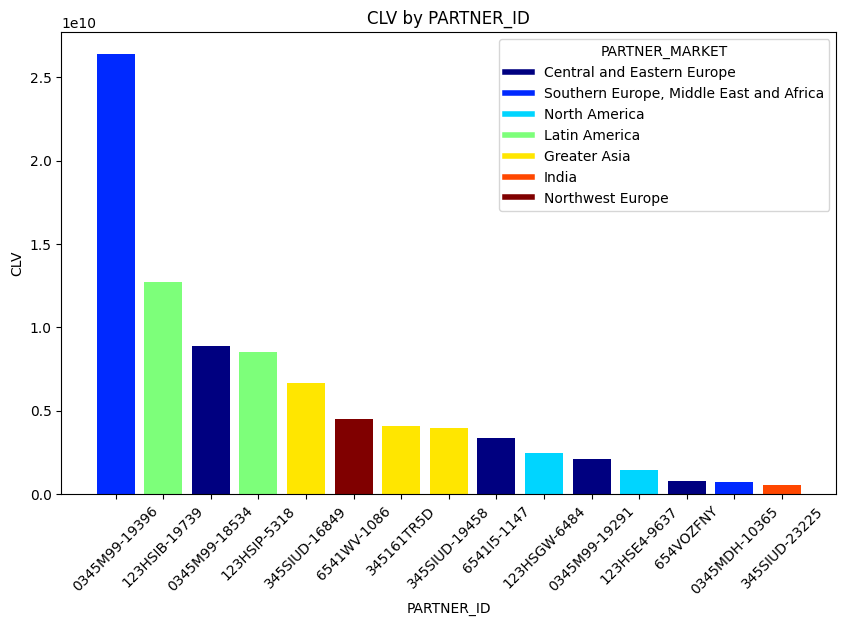

In [ ]:
unique_continents = agg_df['PARTNER_MARKET'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(unique_continents)))

continent_colors = {PARTNER_MARKET: color for PARTNER_MARKET, color in zip(unique_continents, colors)}
agg_df['color'] = agg_df['PARTNER_MARKET'].map(continent_colors)
plt.figure(figsize=(10, 6))
agg_df = agg_df.sort_values(by=['CLV'],ascending=False)
bars = plt.bar(agg_df.index, agg_df['CLV'], color=agg_df['color'])
plt.xlabel('PARTNER_ID')
plt.ylabel('CLV')
plt.title('CLV by PARTNER_ID')
plt.xticks(agg_df.index)
plt.xticks(rotation=45)
legend_labels = [plt.Line2D([0], [0], color=continent_colors[PARTNER_MARKET], lw=4, label=PARTNER_MARKET) for PARTNER_MARKET in unique_continents]
plt.legend(handles=legend_labels, title='PARTNER_MARKET')
plt.show()

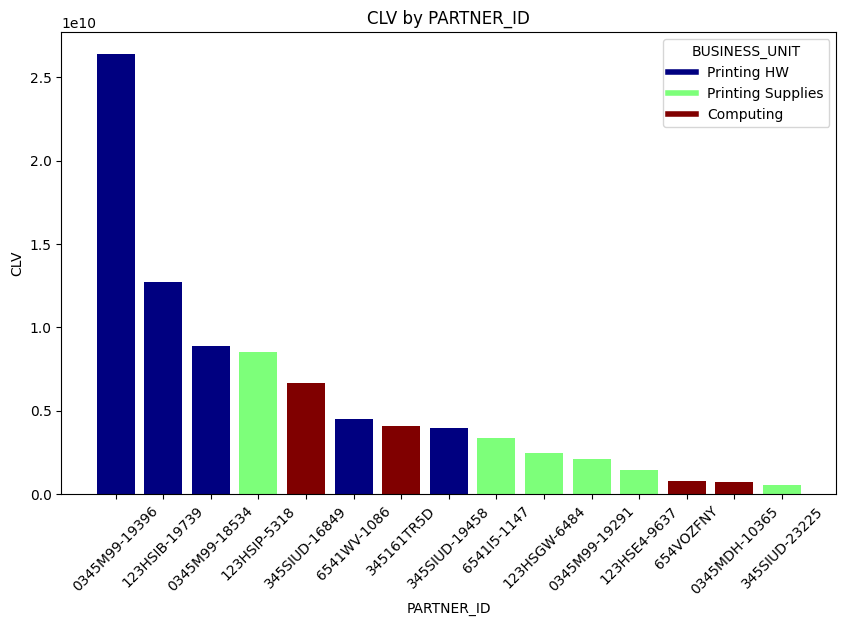

In [ ]:
unique_continents = agg_df['BUSINESS_UNIT'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(unique_continents)))

continent_colors = {BUSINESS_UNIT: color for BUSINESS_UNIT, color in zip(unique_continents, colors)}
agg_df['color'] = agg_df['BUSINESS_UNIT'].map(continent_colors)
plt.figure(figsize=(10, 6))
agg_df = agg_df.sort_values(by=['CLV'],ascending=False)
bars = plt.bar(agg_df.index, agg_df['CLV'], color=agg_df['color'])
plt.xlabel('PARTNER_ID')
plt.ylabel('CLV')
plt.title('CLV by PARTNER_ID')
plt.xticks(agg_df.index)
plt.xticks(rotation=45)
legend_labels = [plt.Line2D([0], [0], color=continent_colors[PARTNER_MARKET], lw=4, label=PARTNER_MARKET) for PARTNER_MARKET in unique_continents]
plt.legend(handles=legend_labels, title='BUSINESS_UNIT')
plt.show()

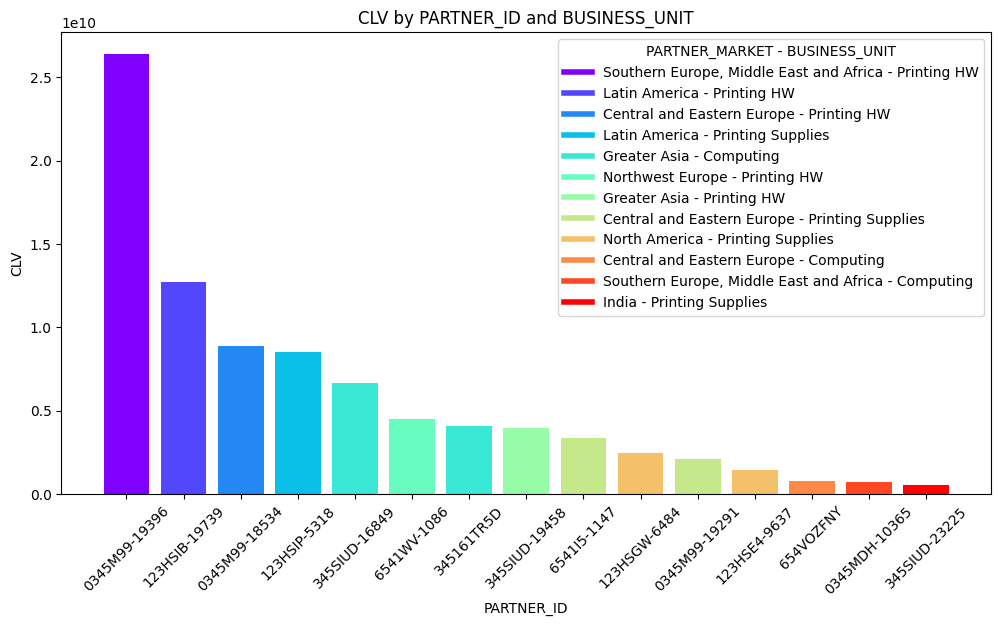

In [ ]:
unique_combinations = agg_df[['PARTNER_MARKET', 'BUSINESS_UNIT']].drop_duplicates()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_combinations)))
combination_colors = {tuple(combination): color for combination, color in zip(unique_combinations.values, colors)}
agg_df['color'] = [combination_colors[tuple(combination)] for combination in agg_df[['PARTNER_MARKET', 'BUSINESS_UNIT']].values]
plt.figure(figsize=(12, 6))
bars = plt.bar(agg_df.index, agg_df['CLV'], color=agg_df['color'])
plt.xlabel('PARTNER_ID')
plt.ylabel('CLV')
plt.title('CLV by PARTNER_ID and BUSINESS_UNIT')
plt.xticks(agg_df.index)
plt.xticks(rotation=45)
legend_labels = [plt.Line2D([0], [0], color=color, lw=4, label=f'{PARTNER_MARKET} - {BUSINESS_UNIT}')
                 for (PARTNER_MARKET, BUSINESS_UNIT), color in combination_colors.items()]
plt.legend(handles=legend_labels, title='PARTNER_MARKET - BUSINESS_UNIT')
plt.show()